In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('stocks.csv')
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000


In [3]:
print(f'The dataset contains {df.shape[0]} rows and {df.shape[1]} columns')
print(f'The dataset contains {df.isnull().sum().sum()} missing values')
print(f'The dataset contains {df.duplicated().sum()} duplicated values')

The dataset contains 248 rows and 8 columns
The dataset contains 0 missing values
The dataset contains 0 duplicated values


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ticker     248 non-null    object 
 1   Date       248 non-null    object 
 2   Open       248 non-null    float64
 3   High       248 non-null    float64
 4   Low        248 non-null    float64
 5   Close      248 non-null    float64
 6   Adj Close  248 non-null    float64
 7   Volume     248 non-null    int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 15.6+ KB


## Open

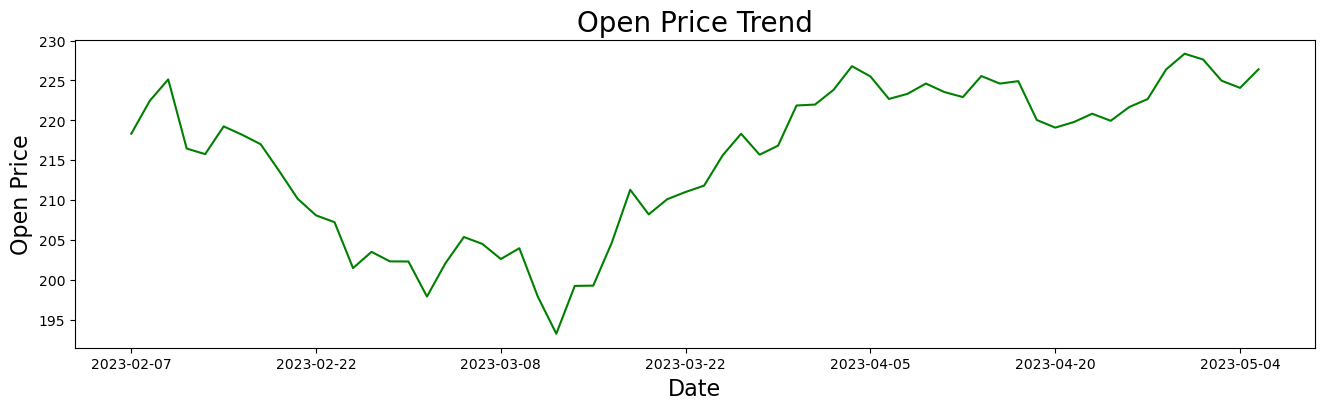

In [5]:
df['Open'].groupby(df['Date']).mean().plot(figsize=(16,4), color='g')
plt.title('Open Price Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Open Price', fontsize=16)
plt.show();

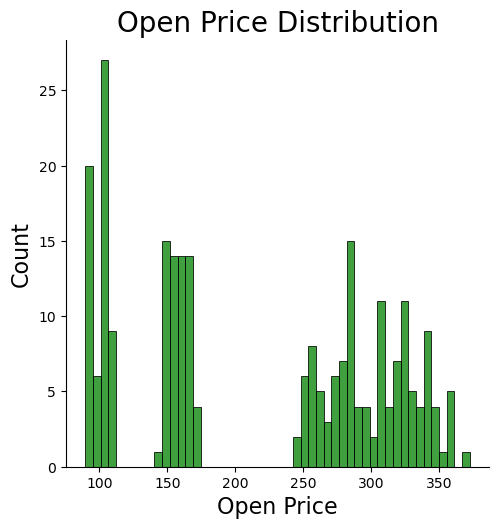

In [6]:
sns.displot(df['Open'], bins=50, color='g')
plt.title('Open Price Distribution', fontsize=20)
plt.xlabel('Open Price', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

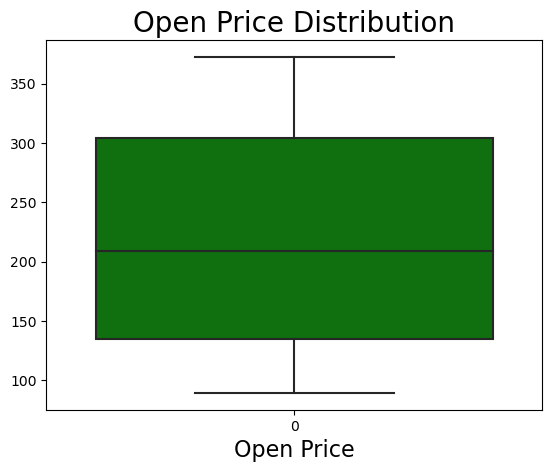

In [13]:
sns.boxplot(df['Open'], color='g')
plt.title('Open Price Distribution', fontsize=20)
plt.xlabel('Open Price', fontsize=16)
plt.show();

## Close

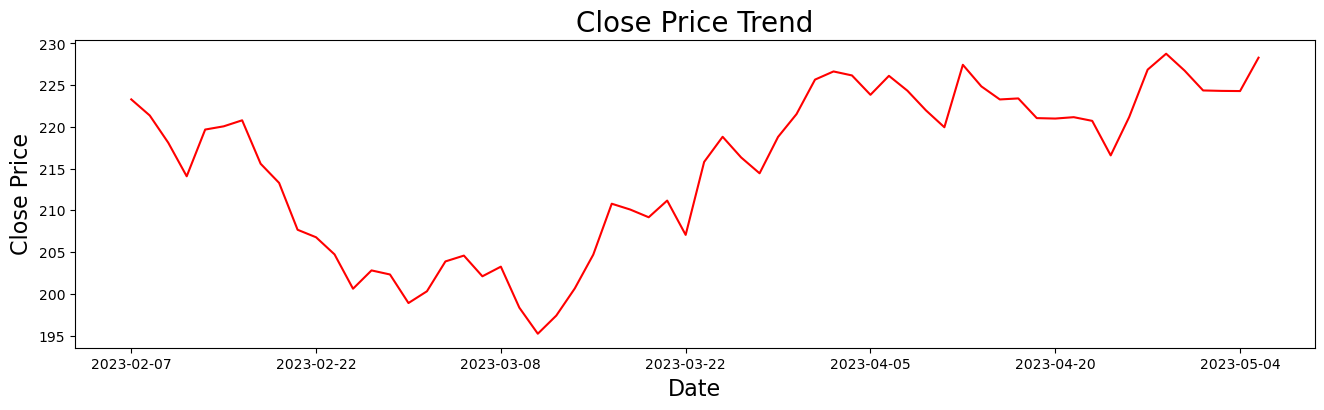

In [14]:
df['Close'].groupby(df['Date']).mean().plot(figsize=(16,4), color='r')
plt.title('Close Price Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Close Price', fontsize=16)
plt.show();

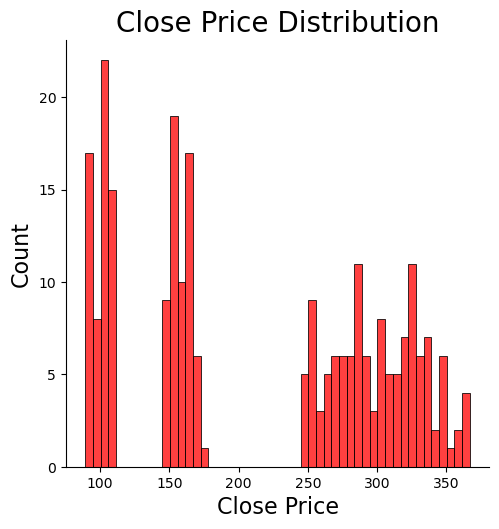

In [15]:
sns.displot(df['Close'], bins=50, color='r')
plt.title('Close Price Distribution', fontsize=20)
plt.xlabel('Close Price', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

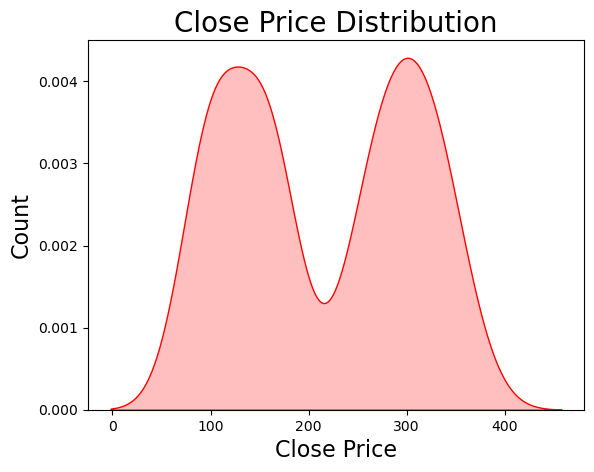

In [16]:
sns.kdeplot(df['Close'], shade=True, color='r')
plt.title('Close Price Distribution', fontsize=20)
plt.xlabel('Close Price', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

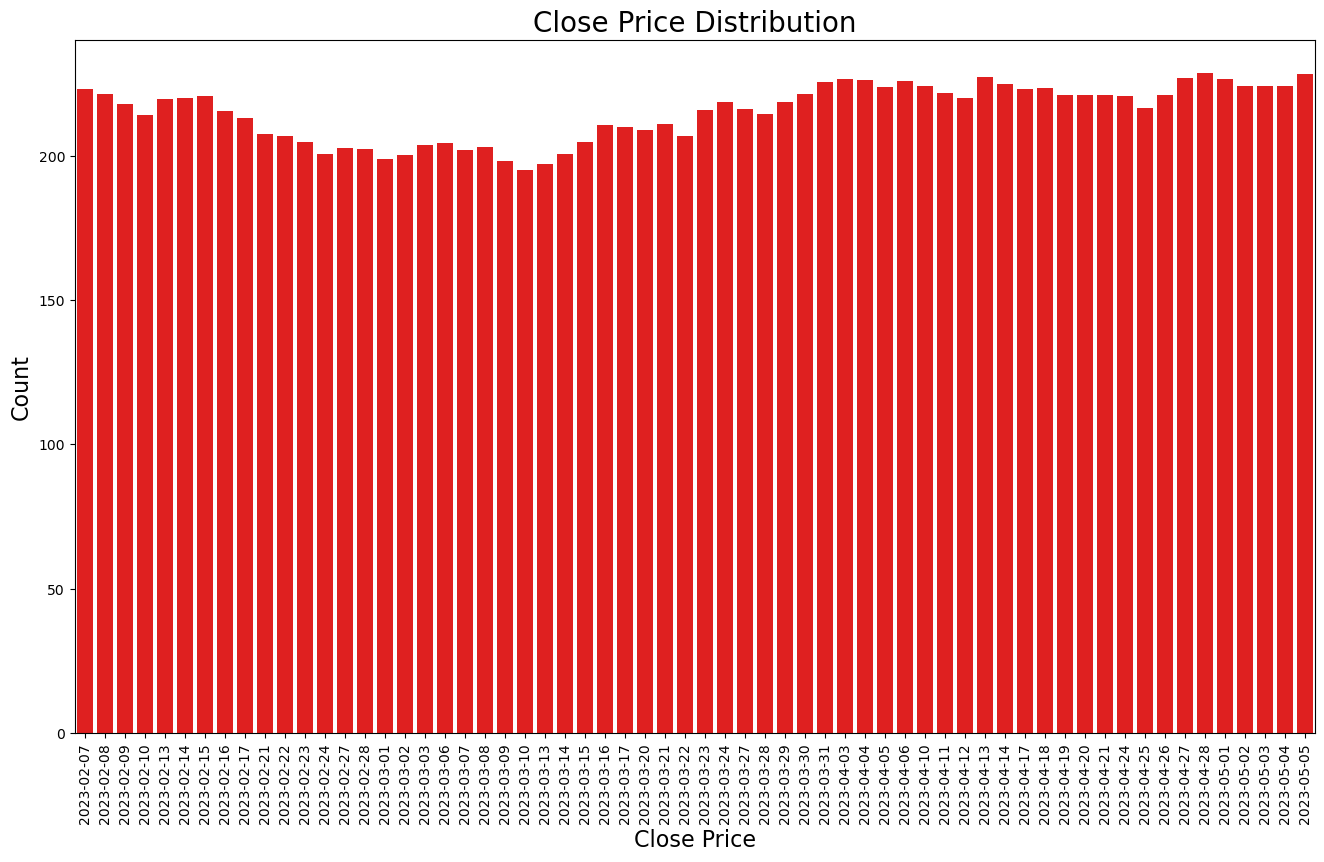

In [19]:
close_date = df.groupby('Date')['Close'].mean().reset_index()
plt.figure(figsize=(16,9))
sns.barplot(x=close_date['Date'], y=close_date['Close'], color='r')
plt.title('Close Price Distribution', fontsize=20)
plt.xlabel('Close Price', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.xticks(rotation=90)
plt.show();

## High

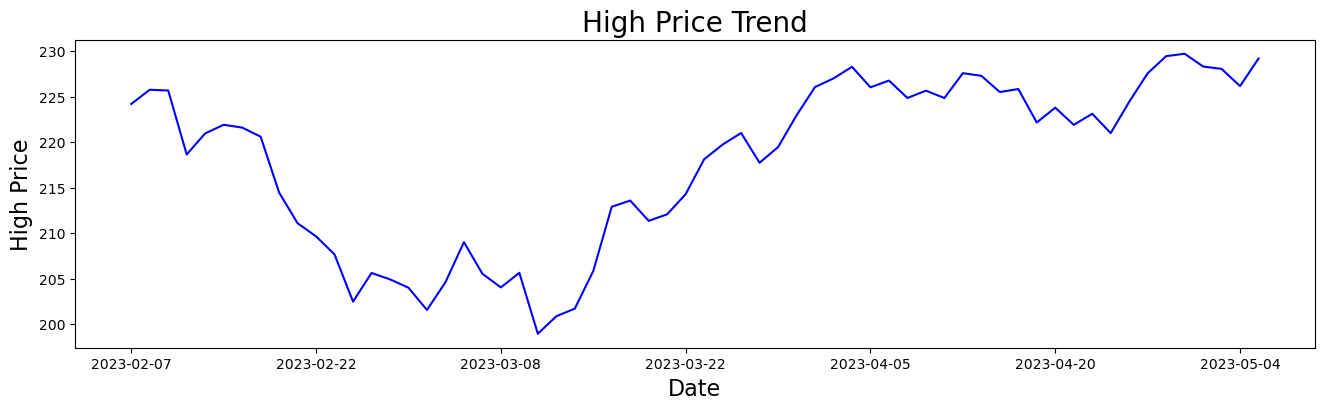

In [20]:
df['High'].groupby(df['Date']).mean().plot(figsize=(16,4), color='b')
plt.title('High Price Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('High Price', fontsize=16)
plt.show();

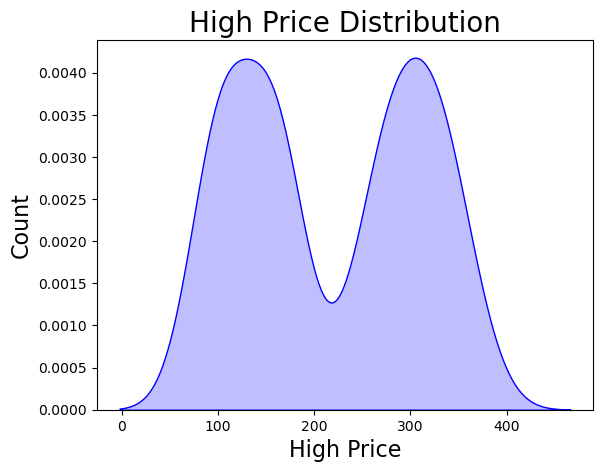

In [21]:
sns.kdeplot(df['High'], shade=True, color='b')
plt.title('High Price Distribution', fontsize=20)
plt.xlabel('High Price', fontsize=16)
plt.ylabel('Count', fontsize=16)
plt.show();

## Low

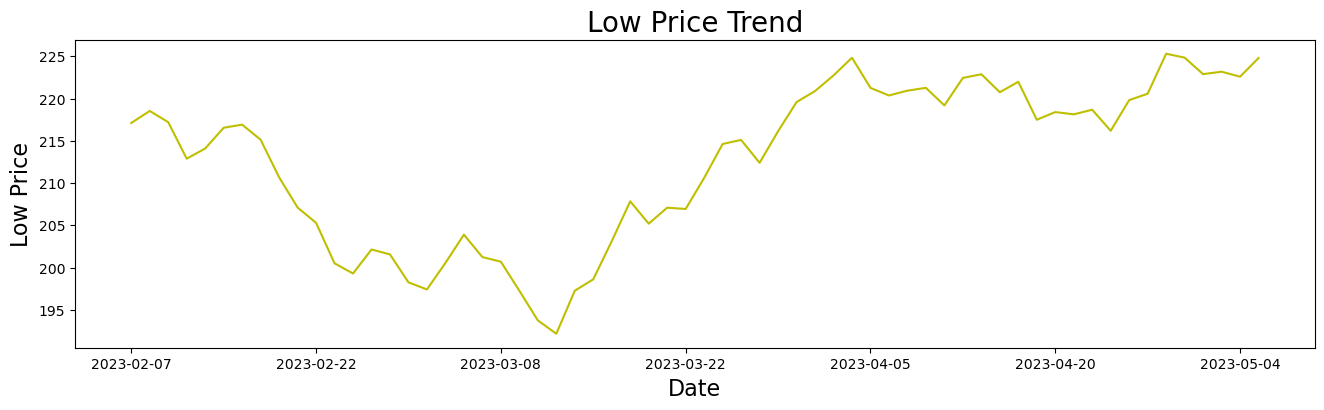

In [22]:
df['Low'].groupby(df['Date']).mean().plot(figsize=(16,4), color='y')
plt.title('Low Price Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Low Price', fontsize=16)
plt.show();

## Adj Close

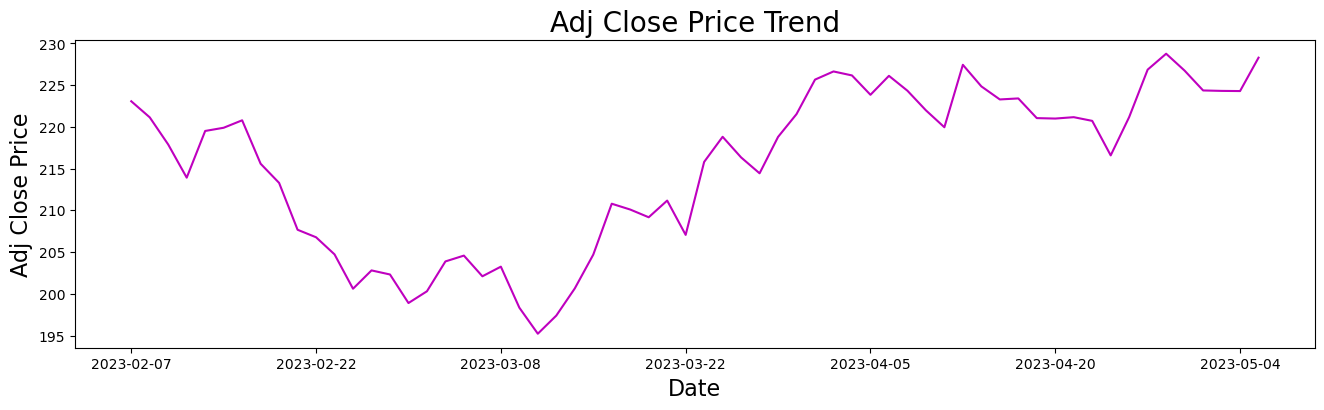

In [23]:
df['Adj Close'].groupby(df['Date']).mean().plot(figsize=(16,4), color='m')
plt.title('Adj Close Price Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Adj Close Price', fontsize=16)
plt.show();

## Open v Close v High v Low v Adj Close

In [24]:
# Extract the months
df['Month'] = pd.DatetimeIndex(df['Date']).month
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2


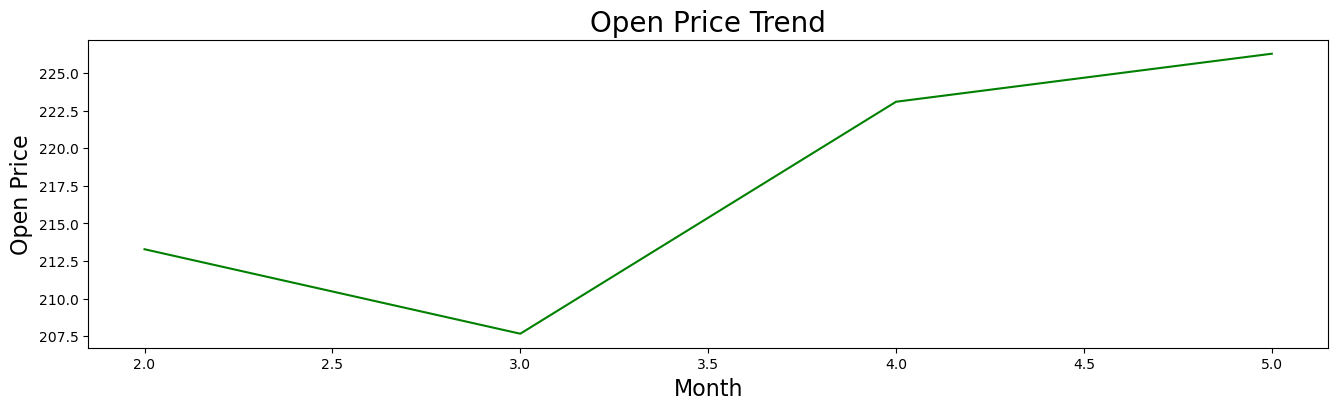

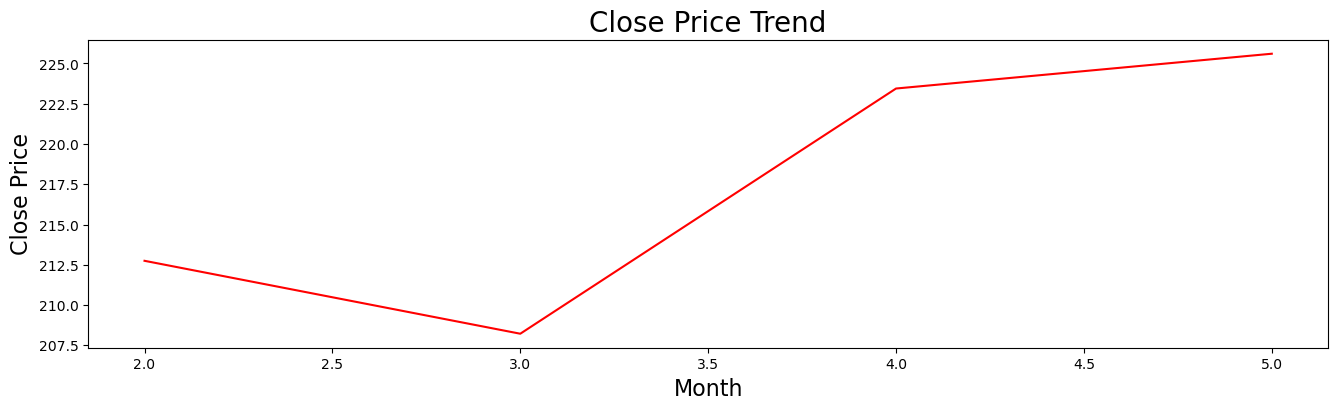

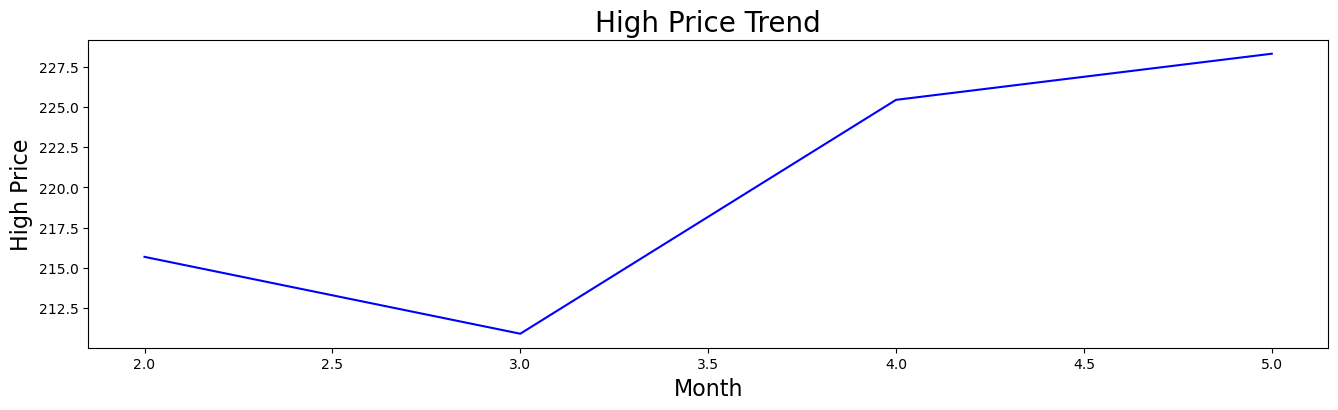

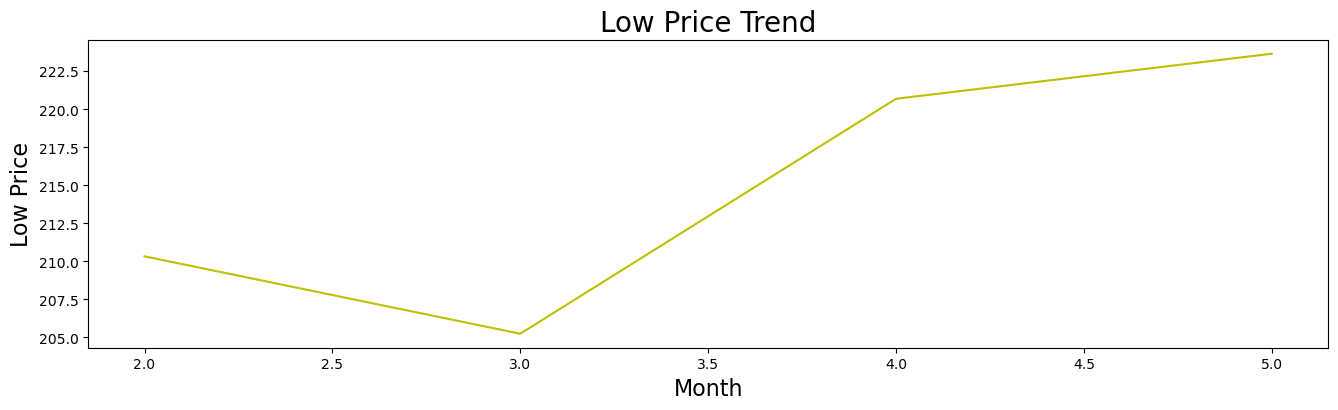

In [25]:
def plot_trend(df, col, color):
    df[col].groupby(df['Month']).mean().plot(figsize=(16,4), color=color)
    plt.title(f'{col} Price Trend', fontsize=20)
    plt.xlabel('Month', fontsize=16)
    plt.ylabel(f'{col} Price', fontsize=16)
    plt.show();

plot_trend(df, 'Open', 'g')
plot_trend(df, 'Close', 'r')
plot_trend(df, 'High', 'b')
plot_trend(df, 'Low', 'y')

* We notice a direct correlation between the Open, Close, High, Low, and Adj Close prices. This is expected as the Open, Close, High, Low, and Adj Close prices are all derived from the same underlying data.
* We also notice a sharp dip in March 2023.

In [27]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Month
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2


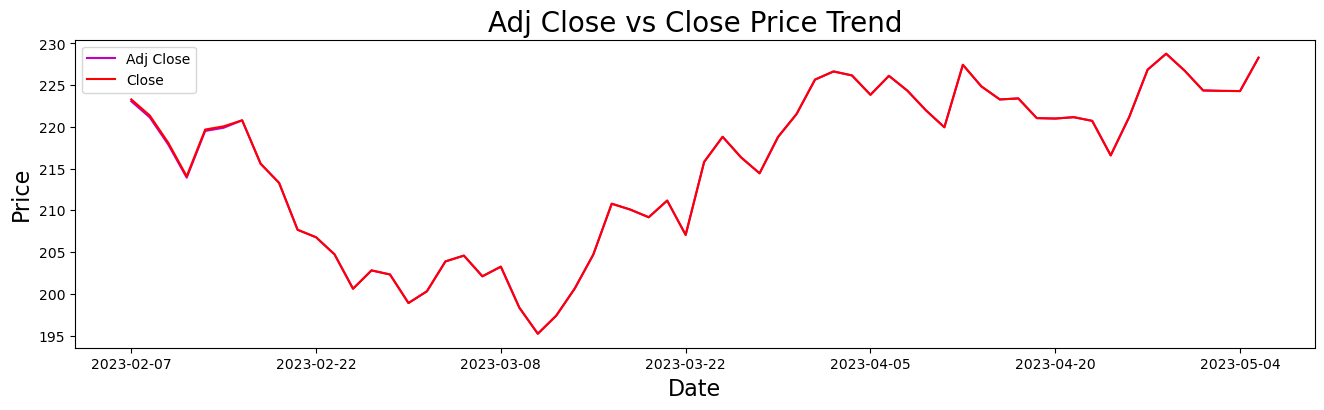

In [28]:
df['Adj Close'].groupby(df['Date']).mean().plot(figsize=(16,4), color='m')
df['Close'].groupby(df['Date']).mean().plot(figsize=(16,4), color='r')
plt.title('Adj Close vs Close Price Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend()
plt.show();

* The Adj (Adjusted) Close price is the closing price after adjustments for all applicable splits and dividend distributions. The Adj Close price is the most accurate representation of the stock's value.
	* *The Volume* is the number of shares that changed hands during the given period.
	* *The Dividends* is the amount of cash paid to shareholders for the distribution of a stock's profits.
	* *The Stock Splits* is the number of times a company has split its stock.
	* *The close price* is the last price at which the stock traded during the given period.


* From our chart, we notice that the adjusted and unadjusted closing prices are very similar. This might be because the stock has not split or paid dividends during the given period.

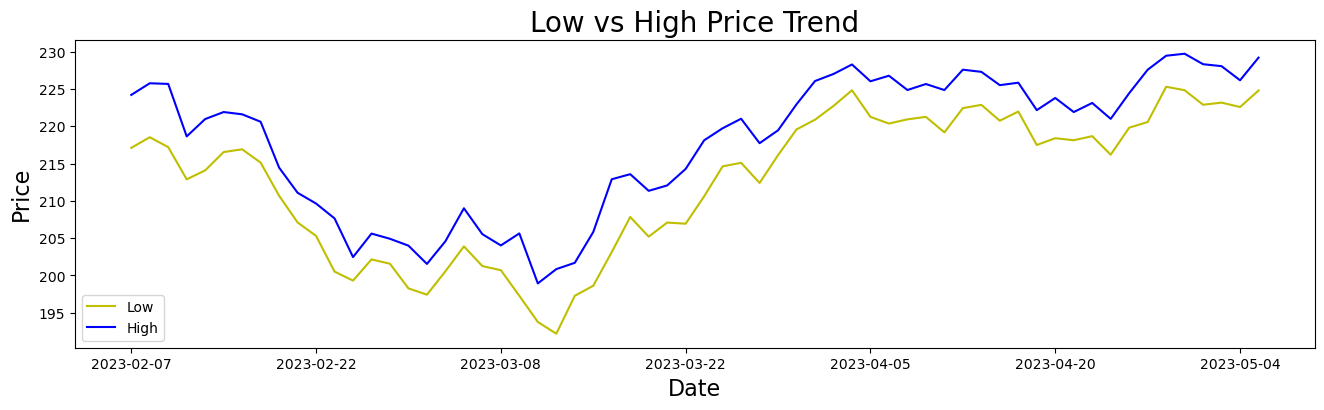

In [29]:
df['Low'].groupby(df['Date']).mean().plot(figsize=(16,4), color='y')
df['High'].groupby(df['Date']).mean().plot(figsize=(16,4), color='b')
plt.title('Low vs High Price Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend()
plt.show();

* We notice a correlation between the high and low prices of the stock.
* *High Price* is the highest price at which the stock traded during the given period.
* *Low Price* is the lowest price at which the stock traded during the given period.

## Volume

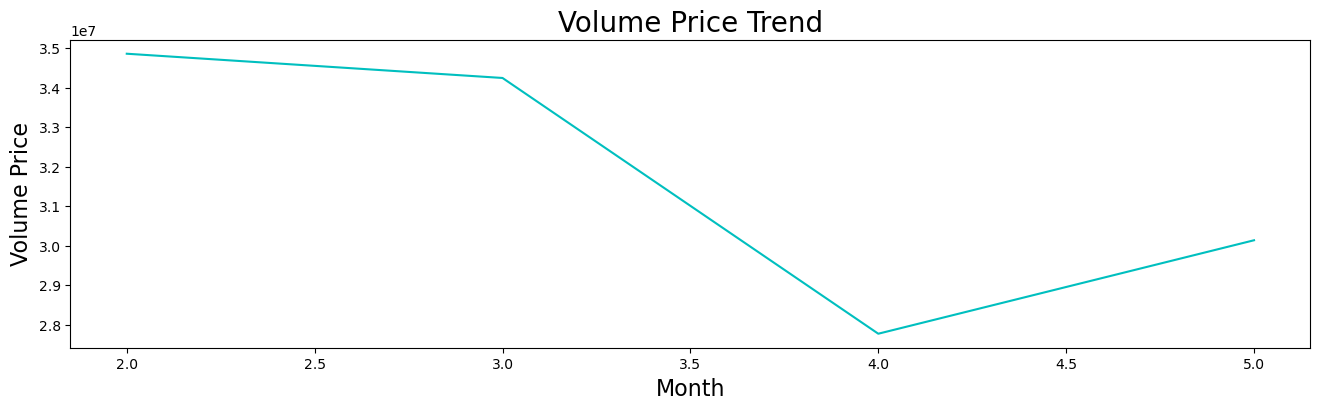

In [30]:
plot_trend(df, 'Volume', 'c')

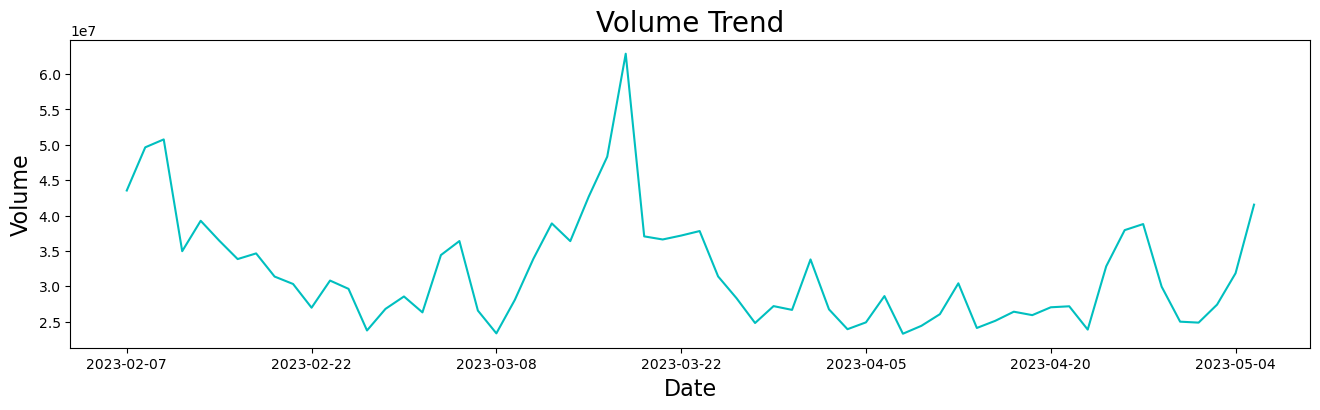

In [31]:
df['Volume'].groupby(df['Date']).mean().plot(figsize=(16,4), color='c')
plt.title('Volume Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.show();

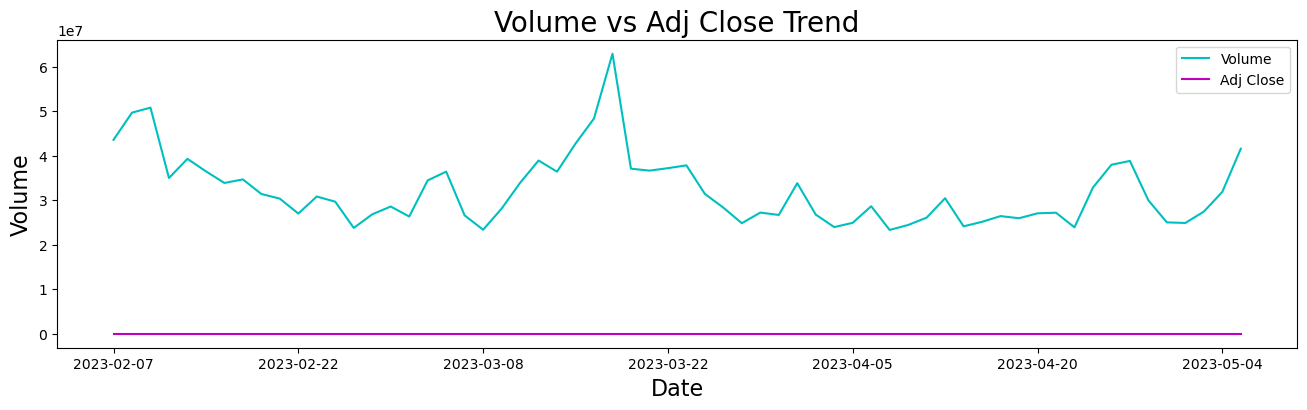

In [32]:
df['Volume'].groupby(df['Date']).mean().plot(figsize=(16,4), color='c')
df['Adj Close'].groupby(df['Date']).mean().plot(figsize=(16,4), color='m')
plt.title('Volume vs Adj Close Trend', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.legend()
plt.show();

We notice a lot of trading in March so let us check the days with the highest volume.

In [33]:
df['Day'] = pd.DatetimeIndex(df['Date']).day

def plot_trend(df, col, color):
    df[col].groupby(df['Day']).mean().plot(figsize=(16,4), color=color)
    plt.title(f'{col} Price Trend', fontsize=20)
    plt.xlabel('Day', fontsize=16)
    plt.ylabel(f'{col} Price', fontsize=16)
    plt.show();

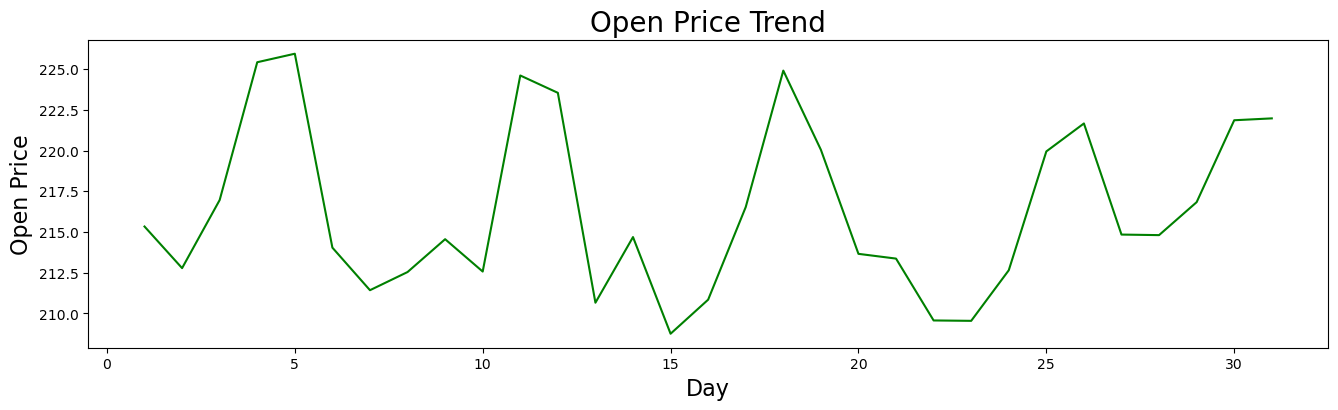

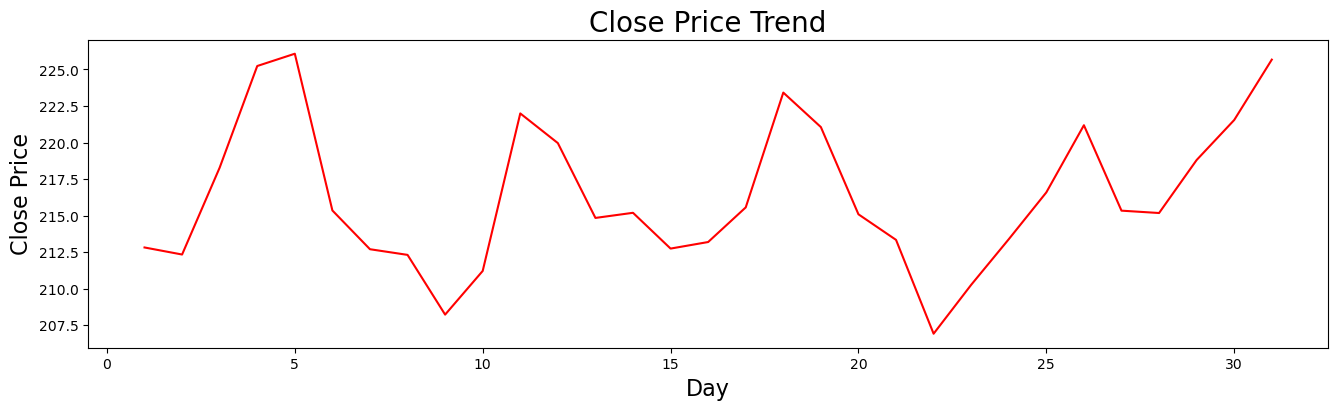

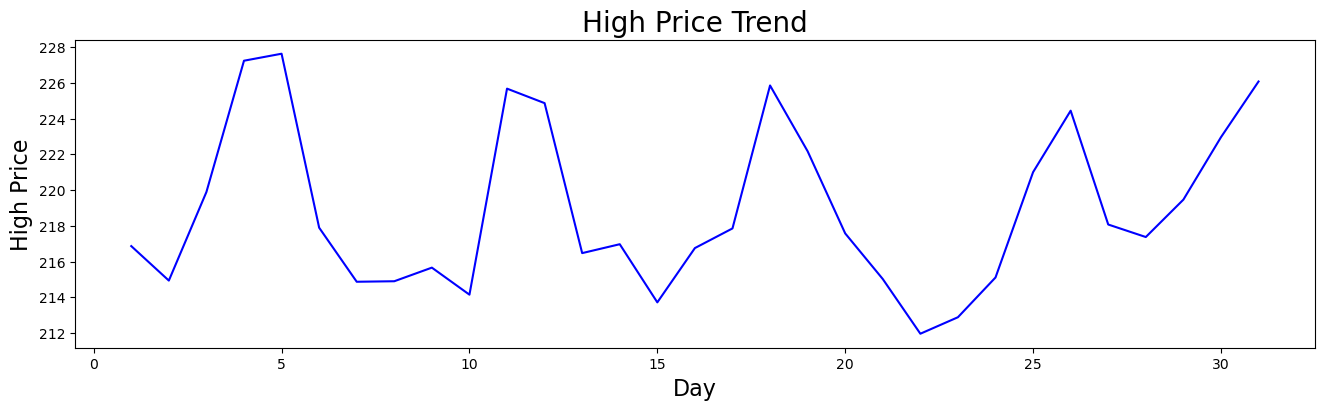

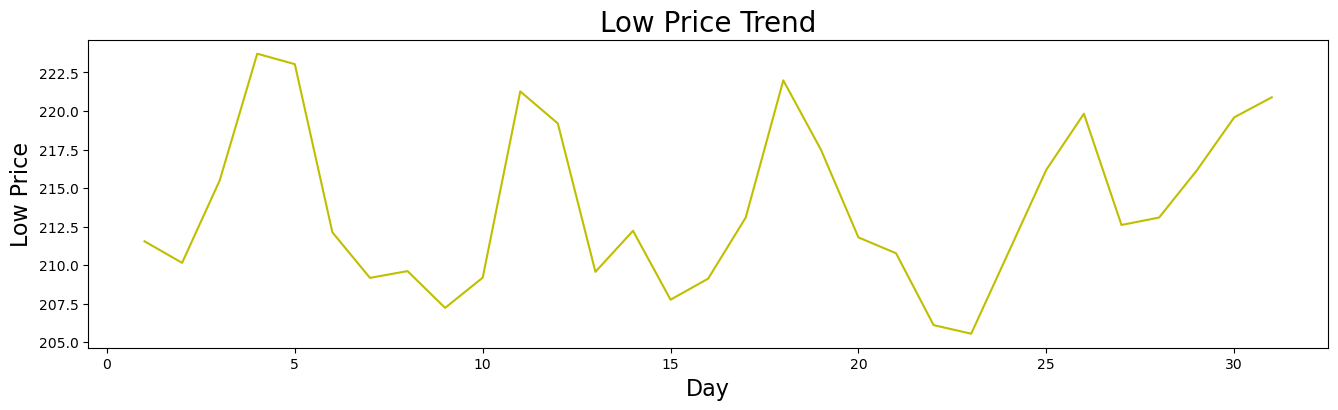

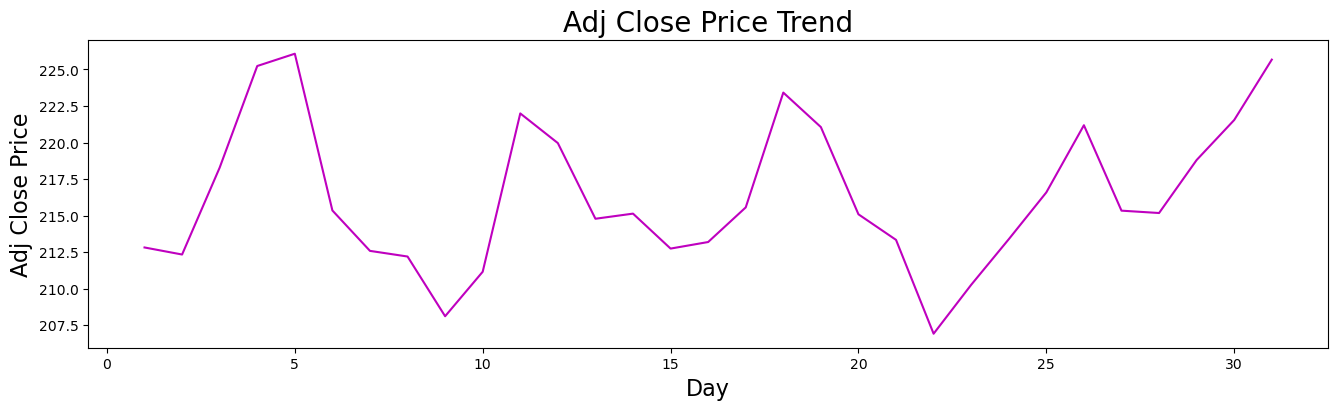

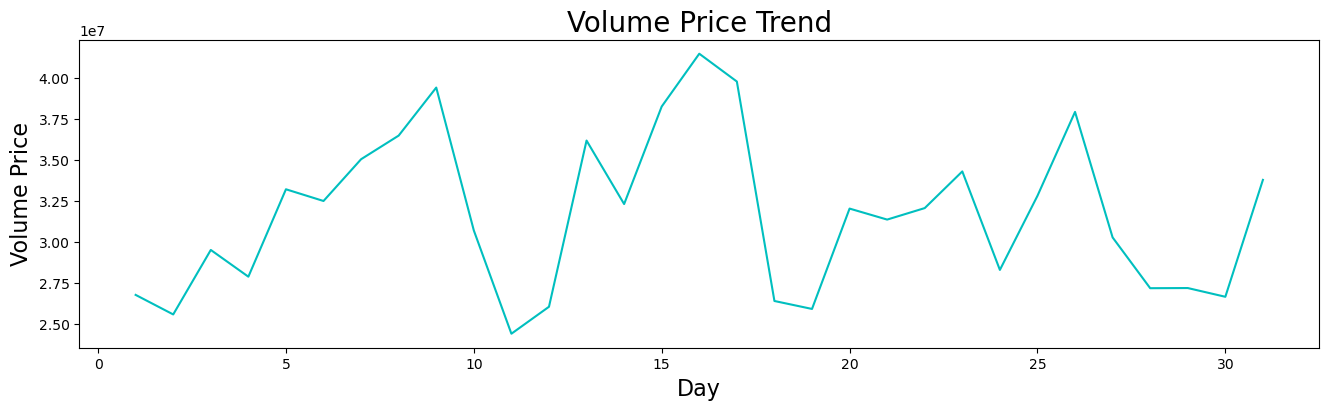

In [34]:
plot_trend(df, 'Open', 'g')
plot_trend(df, 'Close', 'r')
plot_trend(df, 'High', 'b')
plot_trend(df, 'Low', 'y')
plot_trend(df, 'Adj Close', 'm')
plot_trend(df, 'Volume', 'c')

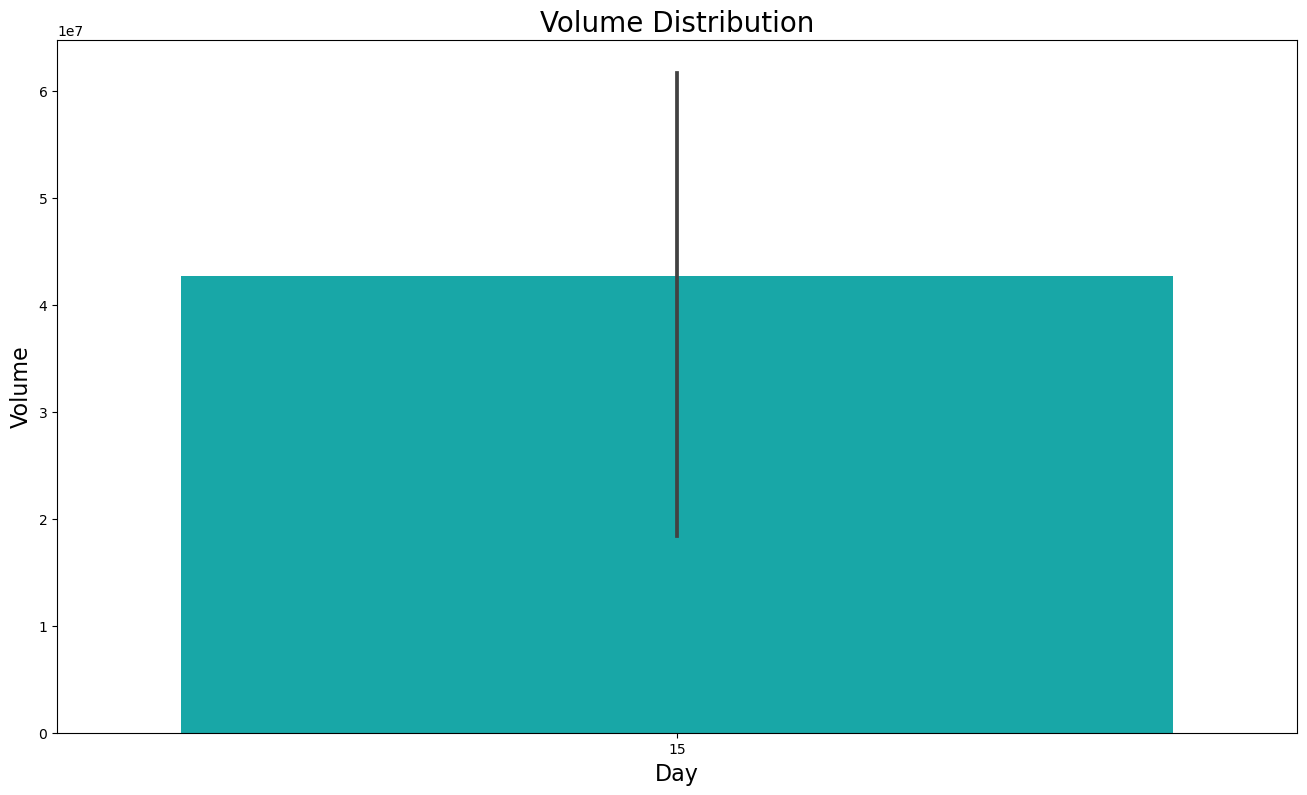

In [36]:
march_15 = df[df['Date'] == '2023-03-15']

plt.figure(figsize=(16,9))
sns.barplot(x=march_15['Day'], y=march_15['Volume'], color='c')
plt.title('Volume Distribution', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Volume', fontsize=16)
plt.show();

## Analyse by Stock

In [37]:
df.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Month,Day
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2,7
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2,8
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2,9
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2,10
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2,13


In [38]:
df['Ticker'].value_counts()

AAPL    62
MSFT    62
NFLX    62
GOOG    62
Name: Ticker, dtype: int64

## 1) Apple

In [39]:
AAPL = df[df['Ticker'] == 'AAPL']
AAPL.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Month,Day
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,2,7
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,2,8
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,2,9
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,2,10
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,2,13


In [40]:
# Get their total volume
AAPL['Volume'].sum()

3737543400

In [41]:
# Mean Adjusment Close Price
AAPL['Adj Close'].mean()

158.2293971892326

In [42]:
# Mean Open Price
AAPL['Open'].mean()

157.77983930034023

In [43]:
# Mean Close Price
AAPL['Close'].mean()

158.24064488564767

In [44]:
# Mean High Price
AAPL['High'].mean()

159.47371009088332

In [45]:
# Mean Low Price
AAPL['Low'].mean()

156.67064519082345

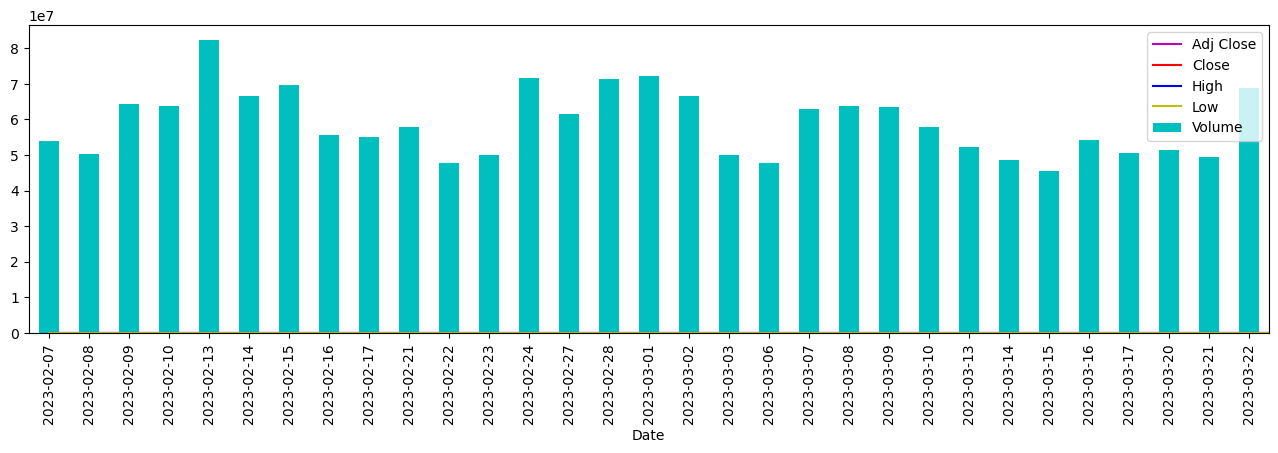

In [51]:
# Plot the trend
AAPL['Volume'].groupby(AAPL['Day']).mean().plot(kind='bar', figsize=(16,4), color='c')
AAPL['Adj Close'].groupby(AAPL['Date']).mean().plot(figsize=(16,4), color='m')
AAPL['Close'].groupby(AAPL['Date']).mean().plot(figsize=(16,4), color='r')
AAPL['High'].groupby(AAPL['Date']).mean().plot(figsize=(16,4), color='b')
AAPL['Low'].groupby(AAPL['Date']).mean().plot(figsize=(16,4), color='y')
plt.legend()
plt.xticks(rotation=90)
plt.show();


## 2) Google

In [52]:
GOOG = df[df['Ticker'] == 'GOOG']
GOOG.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Month,Day
186,GOOG,2023-02-07,103.629997,108.669998,103.547997,108.040001,108.040001,33738800,2,7
187,GOOG,2023-02-08,102.690002,103.580002,98.455002,100.000000,100.000000,73546000,2,8
188,GOOG,2023-02-09,100.540001,100.610001,93.860001,95.459999,95.459999,97798600,2,9
189,GOOG,2023-02-10,95.739998,97.019997,94.529999,94.860001,94.860001,49325300,2,10
190,GOOG,2023-02-13,95.010002,95.349998,94.050003,95.000000,95.000000,43116600,2,13


In [60]:
# Create a function to print all the stock values mean
def print_mean(df):
    print(f'Total Volume: {df["Volume"].sum()}')
    print(f'Mean Adj Close Price: {df["Adj Close"].mean()}')
    print(f'Mean Open Price: {df["Open"].mean()}')
    print(f'Mean Close Price: {df["Close"].mean()}')
    print(f'Mean High Price: {df["High"].mean()}')
    print(f'Mean Low Price: {df["Low"].mean()}')

print_mean(GOOG)

Total Volume: 1904973100
Mean Adj Close Price: 100.63153248448526
Mean Open Price: 100.3819192455661
Mean Close Price: 100.63153248448526
Mean High Price: 101.7925160315729
Mean Low Price: 99.26287103468373


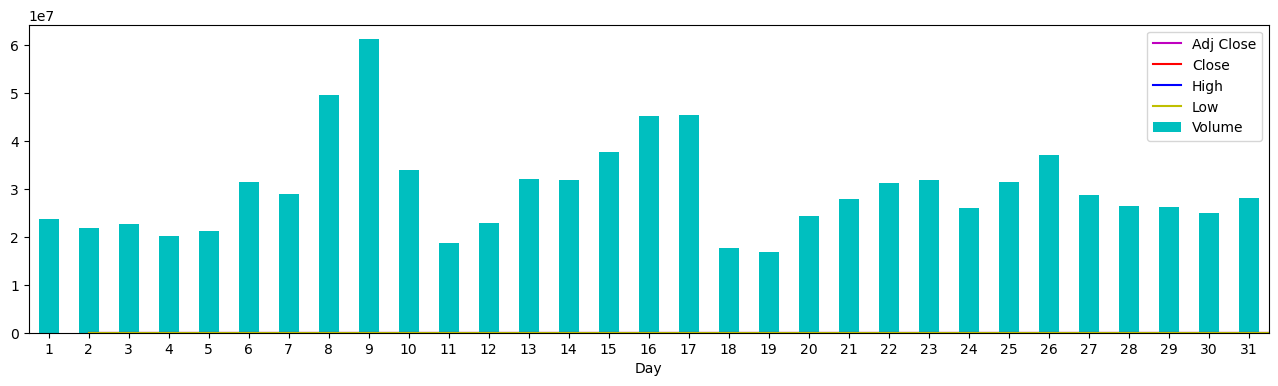

In [61]:
# Plot the mean trend
GOOG['Volume'].groupby(GOOG['Day']).mean().plot(kind='bar', figsize=(16,4), color='c')
GOOG['Adj Close'].groupby(GOOG['Day']).mean().plot(kind='line', figsize=(16,4), color='m')
GOOG['Close'].groupby(GOOG['Day']).mean().plot(figsize=(16,4), color='r')
GOOG['High'].groupby(GOOG['Day']).mean().plot(figsize=(16,4), color='b')
GOOG['Low'].groupby(GOOG['Day']).mean().plot(figsize=(16,4), color='y')
plt.legend();

## 3) Microsoft

In [62]:
MSFT = df[df['Ticker'] == 'MSFT']

print_mean(MSFT)

Total Volume: 1912597900
Mean Adj Close Price: 274.97518207180883
Mean Open Price: 274.73596905123804
Mean Close Price: 275.03983946769466
Mean High Price: 277.7643555671938
Mean Low Price: 272.0277412168441


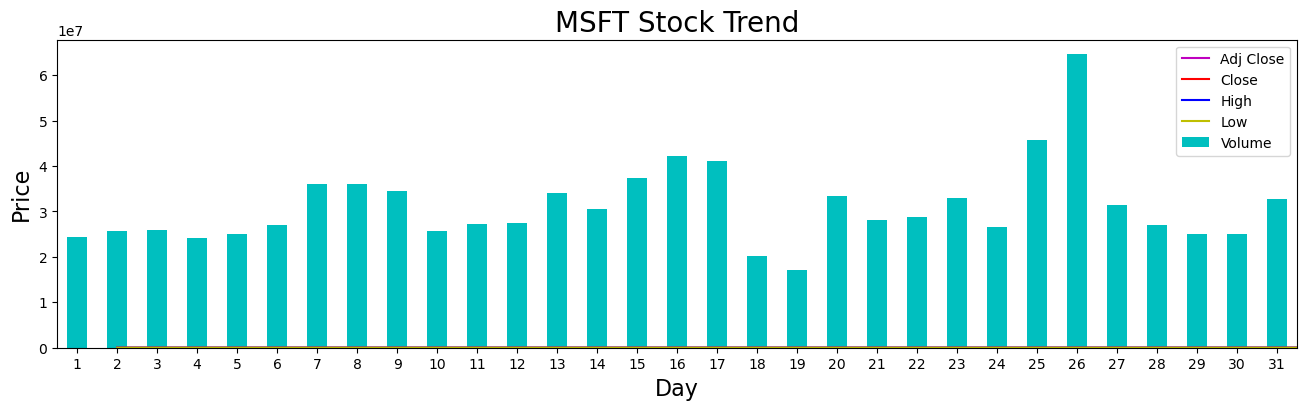

In [65]:
# Plot the mean trend
MSFT['Volume'].groupby(MSFT['Day']).mean().plot(kind='bar', figsize=(16,4), color='c')
MSFT['Adj Close'].groupby(MSFT['Day']).mean().plot(figsize=(16,4), color='m')
MSFT['Close'].groupby(MSFT['Day']).mean().plot(figsize=(16,4), color='r')
MSFT['High'].groupby(MSFT['Day']).mean().plot(figsize=(16,4), color='b')
MSFT['Low'].groupby(MSFT['Day']).mean().plot(figsize=(16,4), color='y')
plt.title('MSFT Stock Trend', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend();

## 4) Netflix

In [66]:
NFLX = df[df['Ticker'] == 'NFLX']

print_mean(NFLX)

Total Volume: 401247400
Mean Adj Close Price: 327.6146771830897
Mean Open Price: 328.1106434483682
Mean Close Price: 327.6146771830897
Mean High Price: 332.6480653824345
Mean Low Price: 322.8285488005607


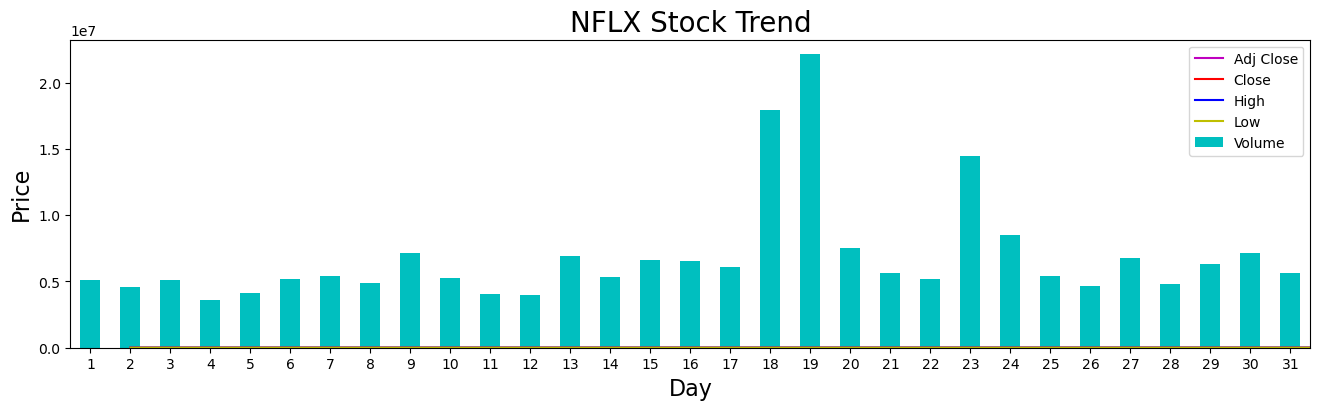

In [67]:
NFLX['Volume'].groupby(NFLX['Day']).mean().plot(kind='bar', figsize=(16,4), color='c')
NFLX['Adj Close'].groupby(NFLX['Day']).mean().plot(figsize=(16,4), color='m')
NFLX['Close'].groupby(NFLX['Day']).mean().plot(figsize=(16,4), color='r')
NFLX['High'].groupby(NFLX['Day']).mean().plot(figsize=(16,4), color='b')
NFLX['Low'].groupby(NFLX['Day']).mean().plot(figsize=(16,4), color='y')
plt.title('NFLX Stock Trend', fontsize=20)
plt.xlabel('Day', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.legend();

# Which stock is the most volatile?
* Volatility is a statistical measure of the dispersion of returns for a given security or market index. In most cases, the higher the volatility, the riskier the security. Volatility is often measured as either the standard deviation or variance between returns from that same security or market index.

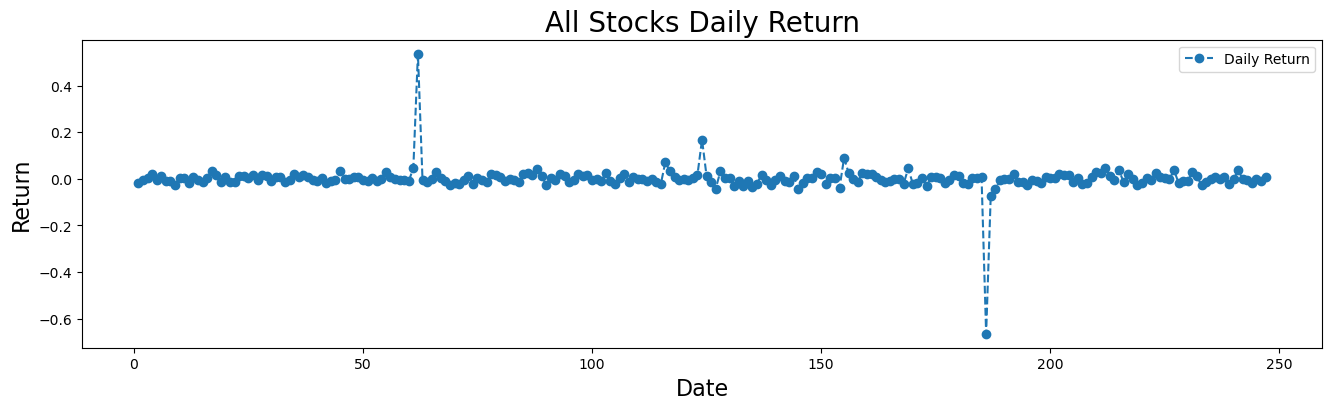

Average Daily Return: 0.0008860939442399828
Volatility: 0.05870721620112014


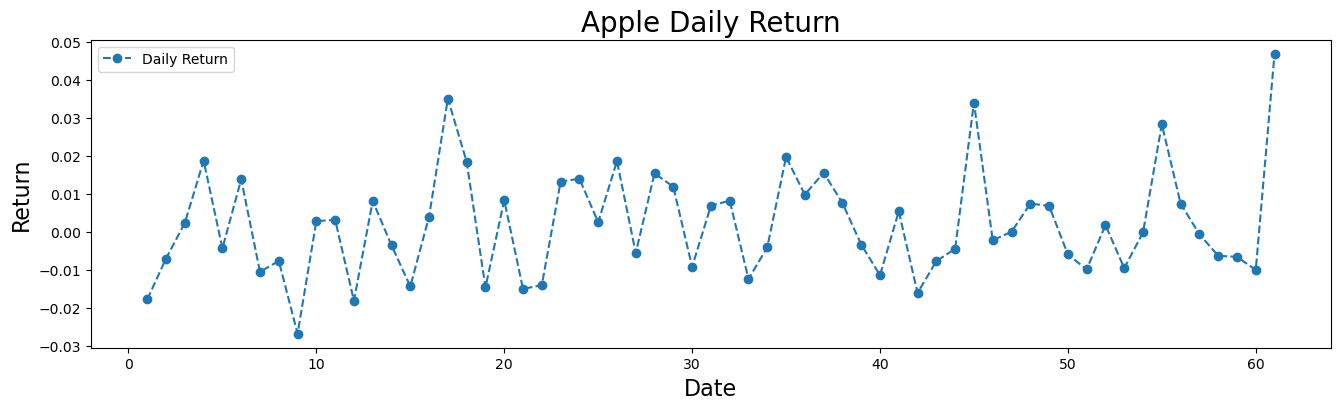

Average Daily Return: 0.0020165498394368146
Volatility: 0.0141516616757471


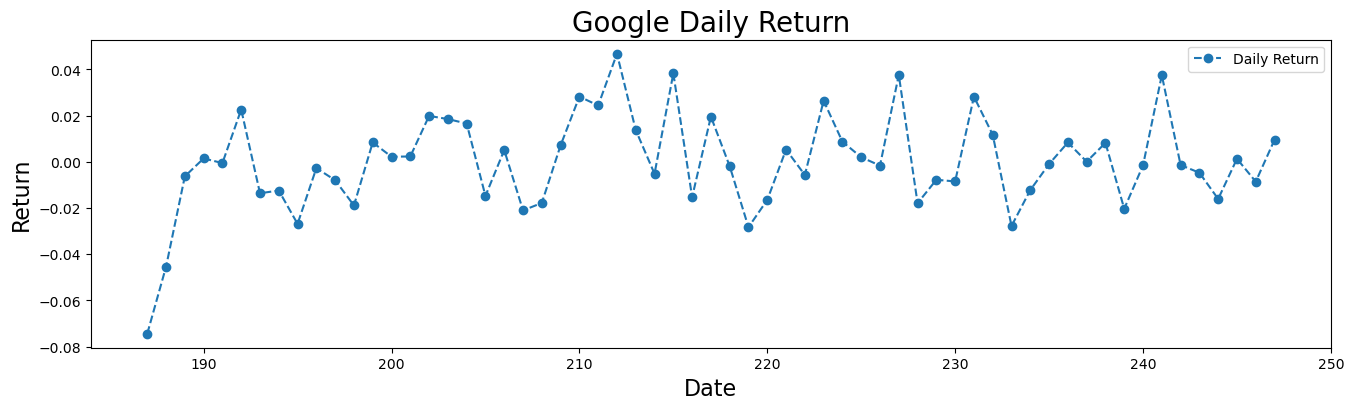

Average Daily Return: -6.680907497623024e-05
Volatility: 0.02071018305867296


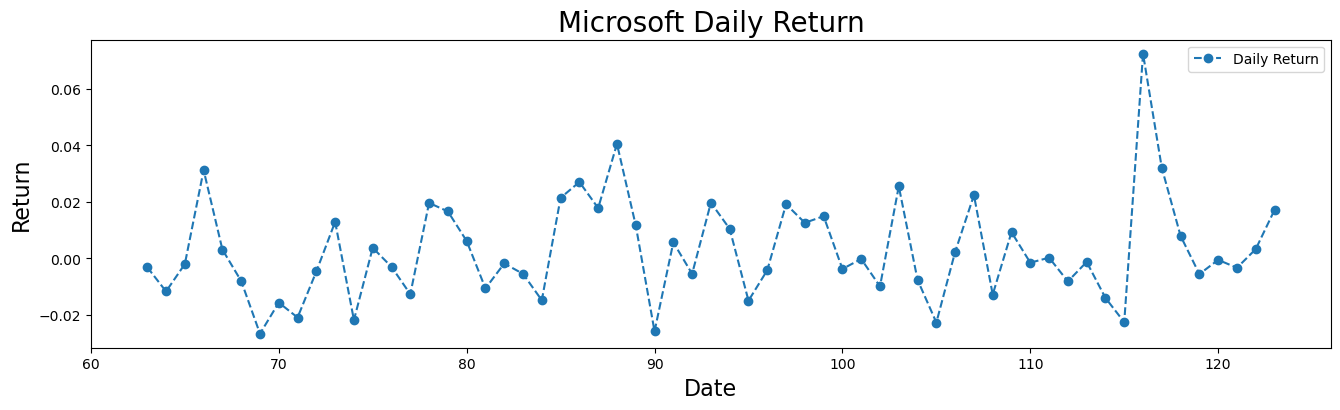

Average Daily Return: 0.0026465147231256726
Volatility: 0.01785336207176081


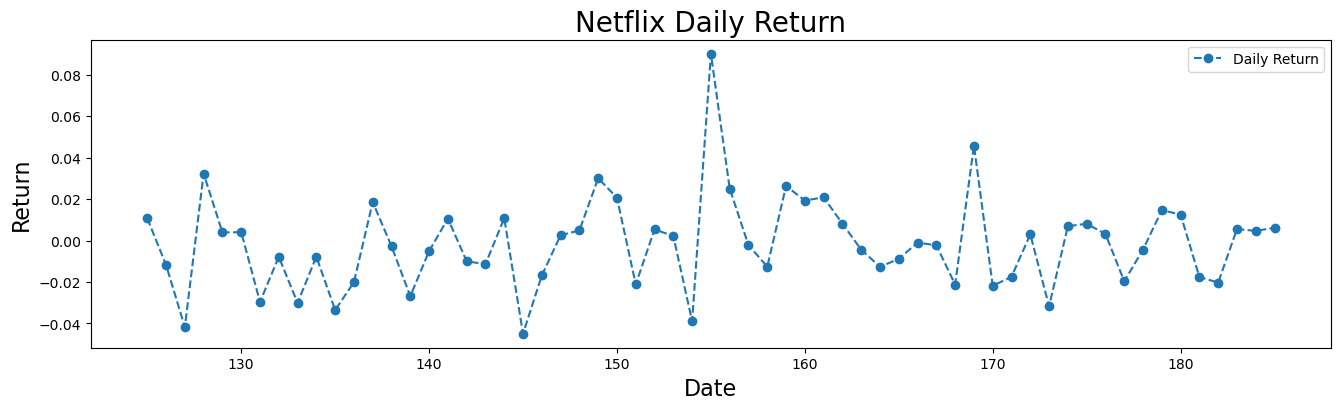

Average Daily Return: -0.001676395789809318
Volatility: 0.02248133504519506


In [77]:
# Create a function to calculate the volatility
def volatility(df, stock):
    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Daily Return'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    plt.title(f'{stock} Daily Return', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Return', fontsize=16)
    plt.show();
    print(f'Average Daily Return: {df["Daily Return"].mean()}')
    print(f'Volatility: {df["Daily Return"].std()}')
    

# Calculate the volatility of the whole dataset
volatility(df, 'All Stocks')


# Calculate the volatility of Apple
volatility(AAPL, 'Apple')


# Calculate the volatility of Google
volatility(GOOG, 'Google')


# Calculate the volatility of Microsoft
volatility(MSFT, 'Microsoft')

# Calculate the volatility of Netflix
volatility(NFLX, 'Netflix')


## Plotting the daily percentage change in the adjusted closing price of the stock

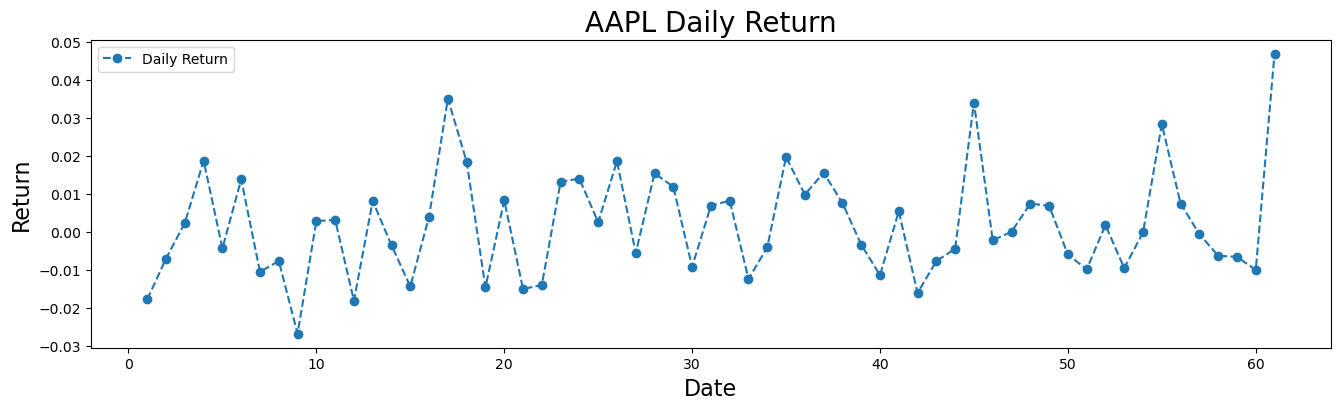

Average Daily Return: 0.0020165498394368146
Volatility: 0.0141516616757471


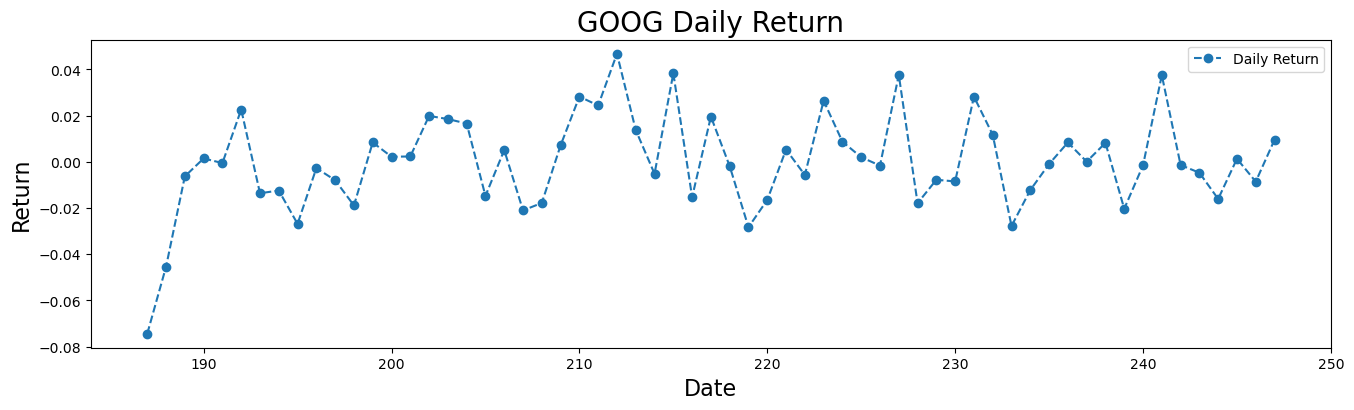

Average Daily Return: -6.680907497623024e-05
Volatility: 0.02071018305867296


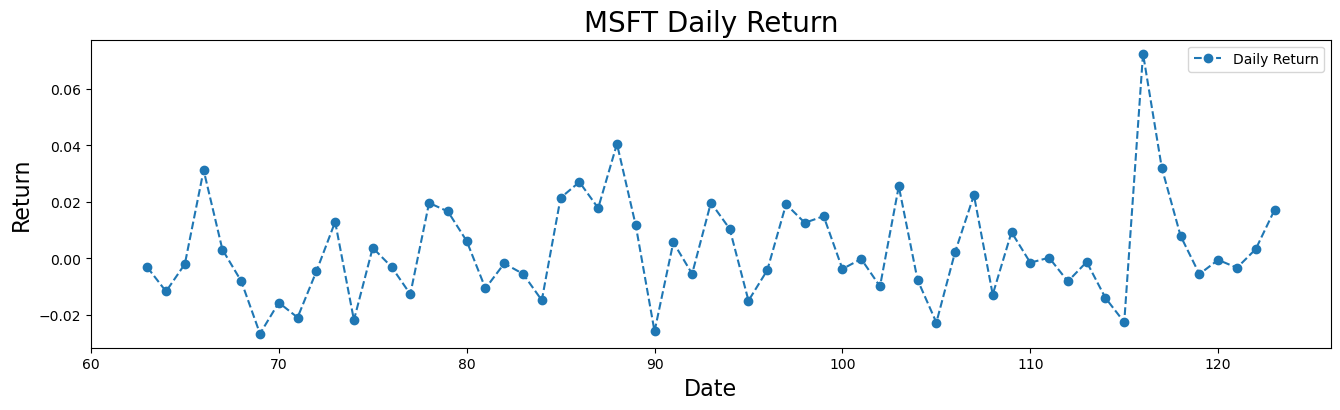

Average Daily Return: 0.0026465147231256726
Volatility: 0.01785336207176081


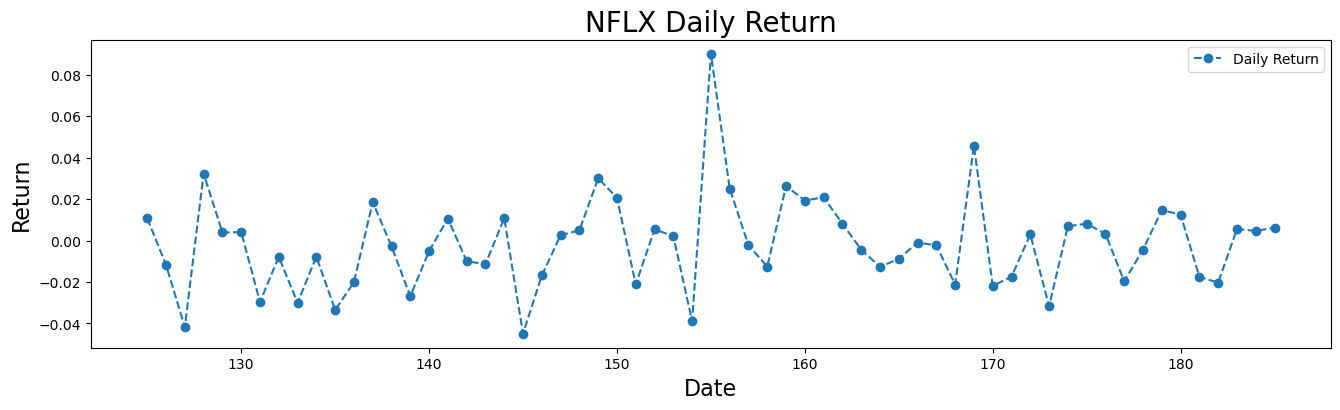

Average Daily Return: -0.001676395789809318
Volatility: 0.02248133504519506


In [76]:
def daily_return(df, stock):
    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Daily Return'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    plt.title(f'{stock} Daily Return', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Return', fontsize=16)
    plt.show();
    print(f'Average Daily Return: {df["Daily Return"].mean()}')
    print(f'Volatility: {df["Daily Return"].std()}')

daily_return(AAPL, 'AAPL')
daily_return(GOOG, 'GOOG')
daily_return(MSFT, 'MSFT')
daily_return(NFLX, 'NFLX')

## Plotting the daily percentage change in the adjusted closing price of the stock

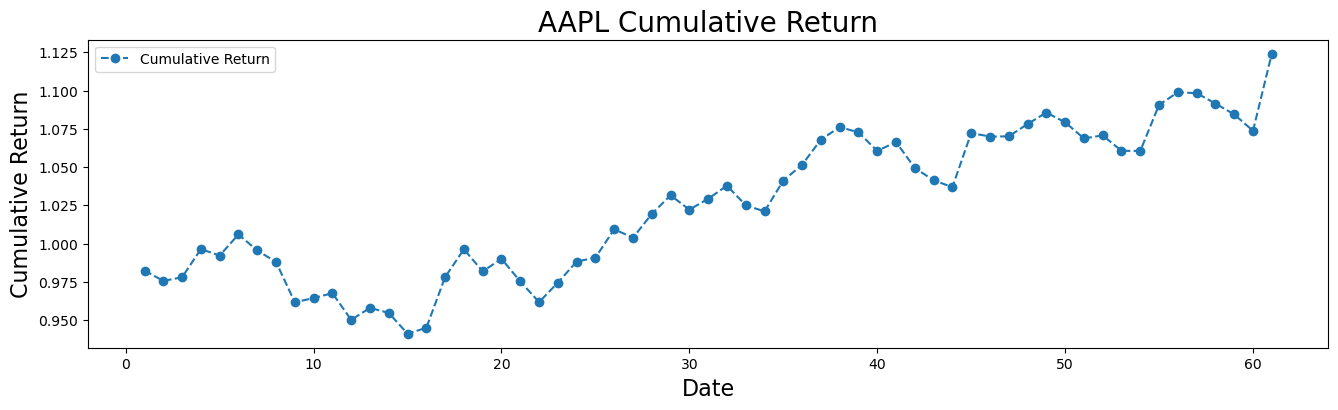

Average Daily Return: 0.0020165498394368146
Volatility: 0.0141516616757471


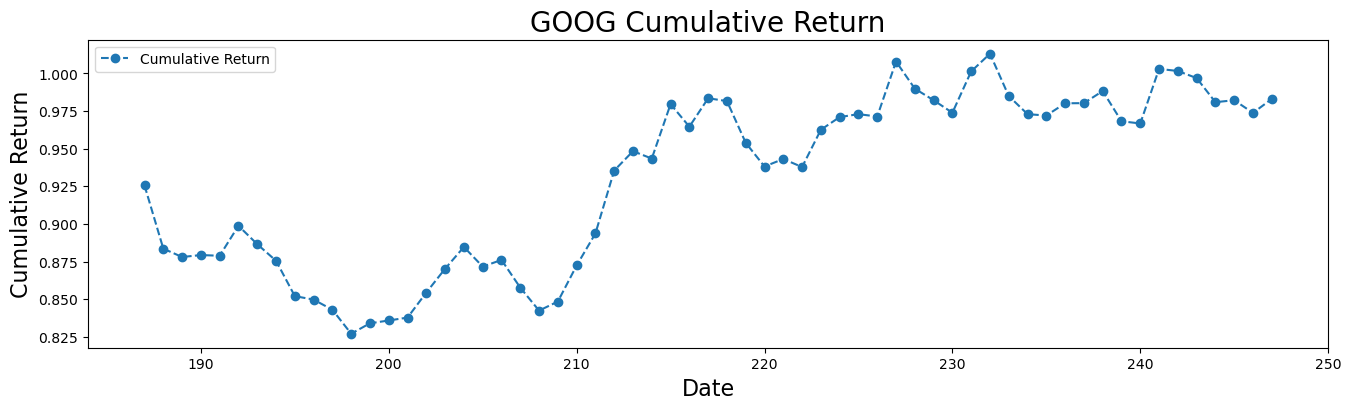

Average Daily Return: -6.680907497623024e-05
Volatility: 0.02071018305867296


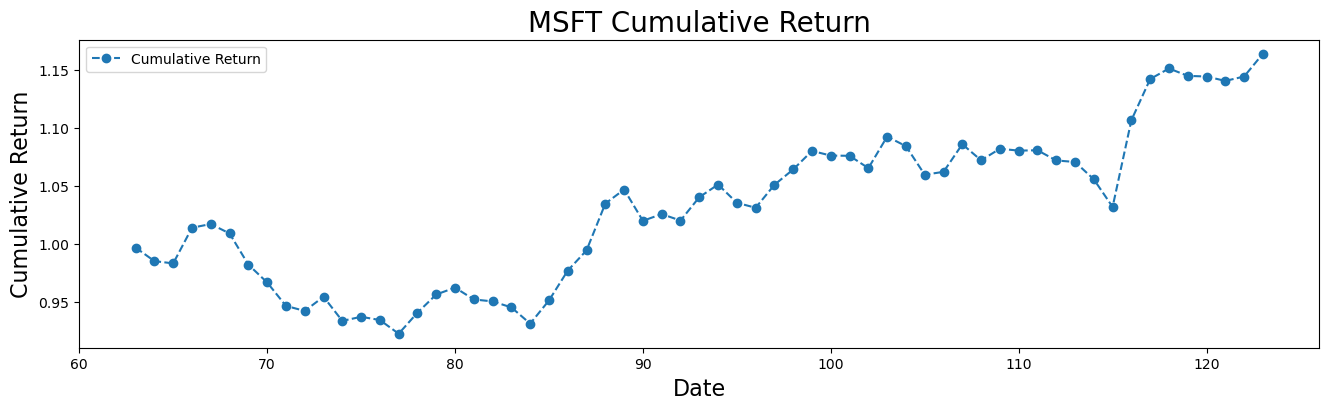

Average Daily Return: 0.0026465147231256726
Volatility: 0.01785336207176081


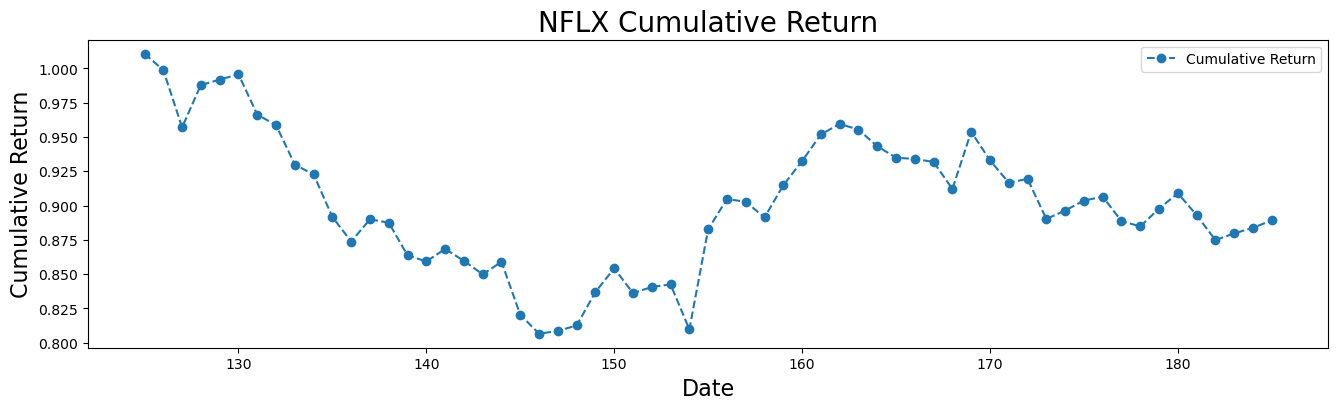

Average Daily Return: -0.001676395789809318
Volatility: 0.02248133504519506


In [78]:
def daily_cumulative_return(df, stock):
    df['Daily Return'] = df['Adj Close'].pct_change()
    df['Cumulative Return'] = (1 + df['Daily Return']).cumprod()
    df['Cumulative Return'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    plt.title(f'{stock} Cumulative Return', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Cumulative Return', fontsize=16)
    plt.show();
    print(f'Average Daily Return: {df["Daily Return"].mean()}')
    print(f'Volatility: {df["Daily Return"].std()}')

daily_cumulative_return(AAPL, 'AAPL')
daily_cumulative_return(GOOG, 'GOOG')
daily_cumulative_return(MSFT, 'MSFT')
daily_cumulative_return(NFLX, 'NFLX')


## Which stock has the highest volume of trades?

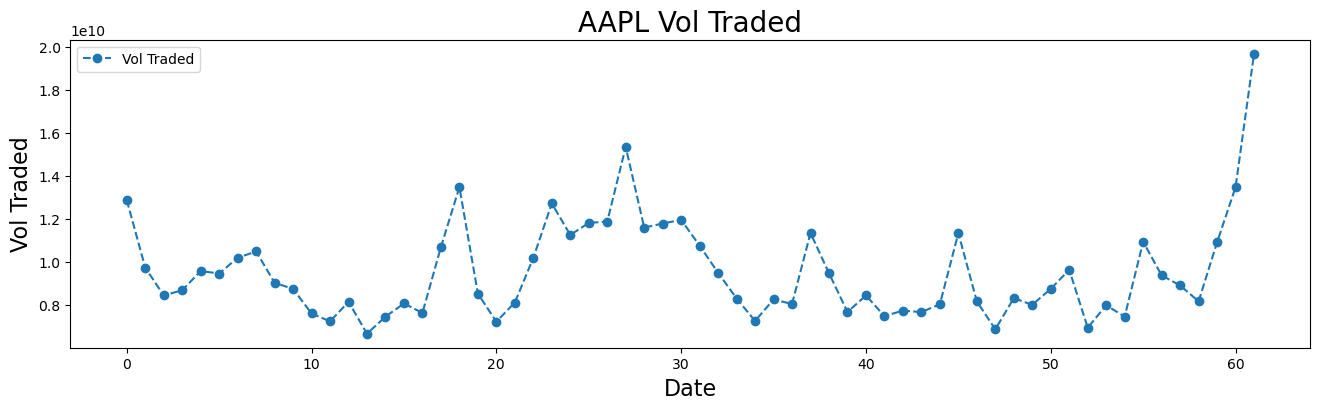

Average Daily Return: 0.0020165498394368146
Volatility: 0.0141516616757471


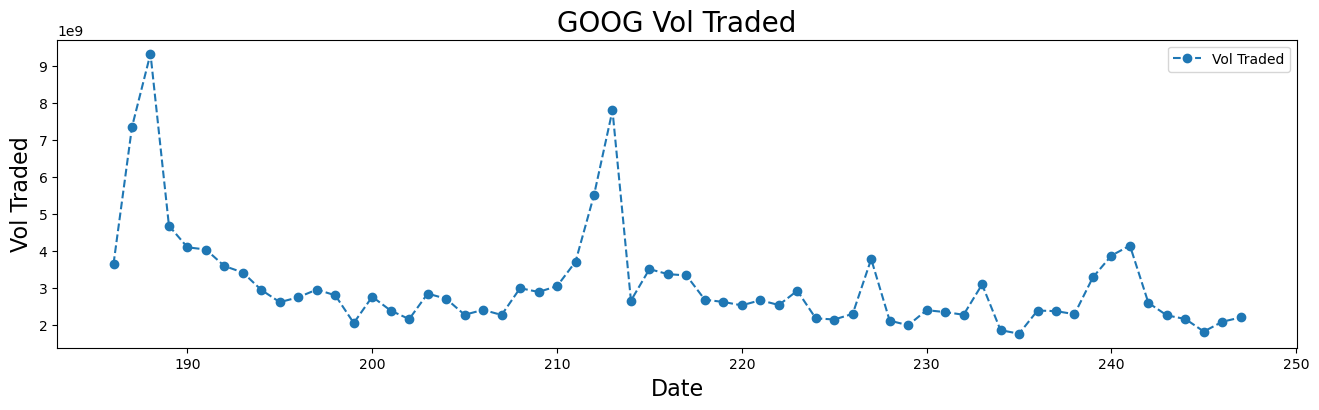

Average Daily Return: -6.680907497623024e-05
Volatility: 0.02071018305867296


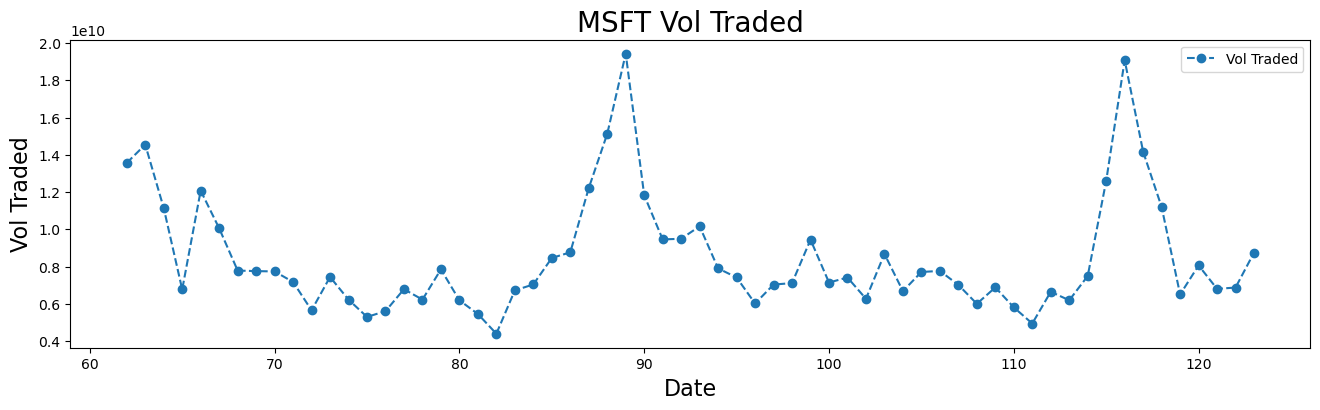

Average Daily Return: 0.0026465147231256726
Volatility: 0.01785336207176081


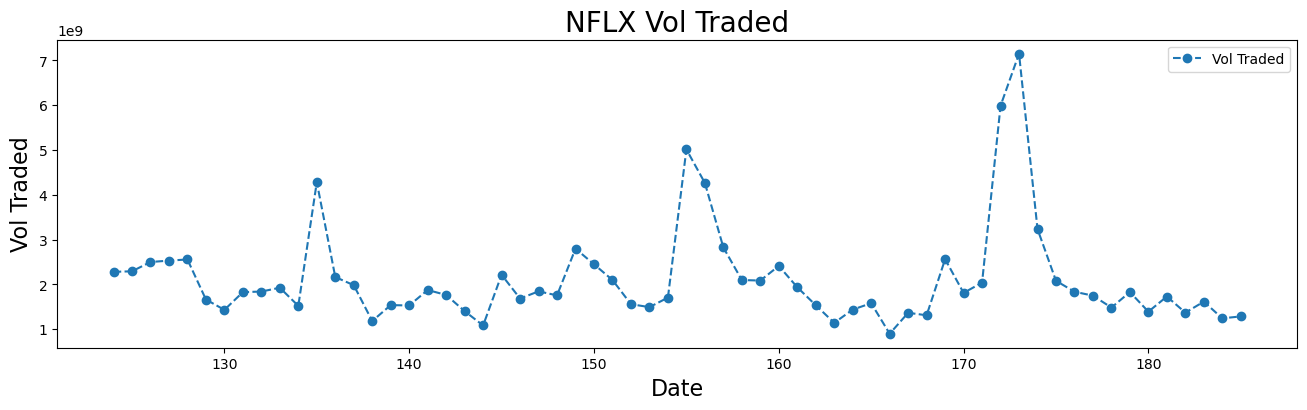

Average Daily Return: -0.001676395789809318
Volatility: 0.02248133504519506


In [79]:
def vol_traded(df, stock):
    df['Vol Traded'] = df['Adj Close'] * df['Volume']
    df['Vol Traded'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    plt.title(f'{stock} Vol Traded', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Vol Traded', fontsize=16)
    plt.show();
    print(f'Average Daily Return: {df["Daily Return"].mean()}')
    print(f'Volatility: {df["Daily Return"].std()}')

vol_traded(AAPL, 'AAPL')
vol_traded(GOOG, 'GOOG')
vol_traded(MSFT, 'MSFT')
vol_traded(NFLX, 'NFLX')

## Which stock has the highest share price?

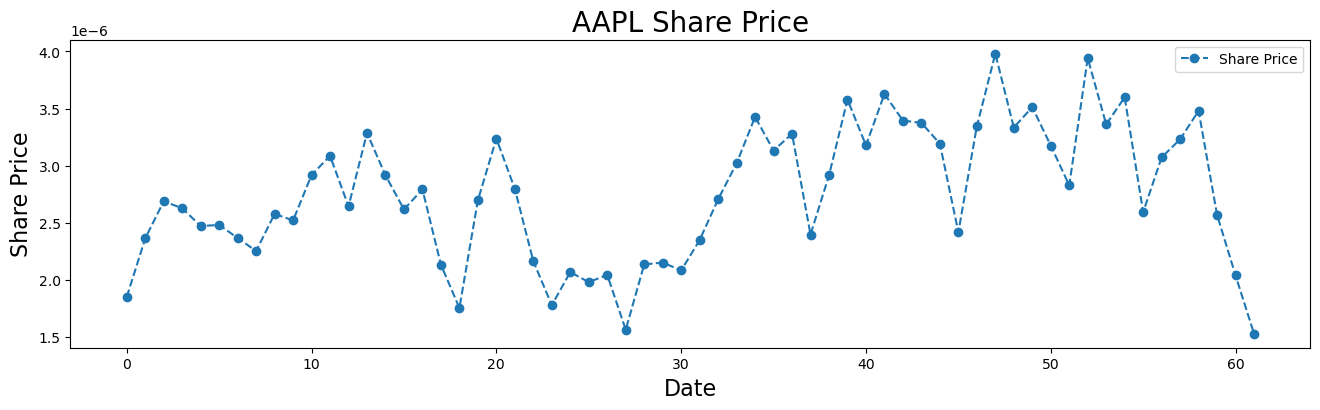

Average Daily Return: 0.0020165498394368146
Volatility: 0.0141516616757471


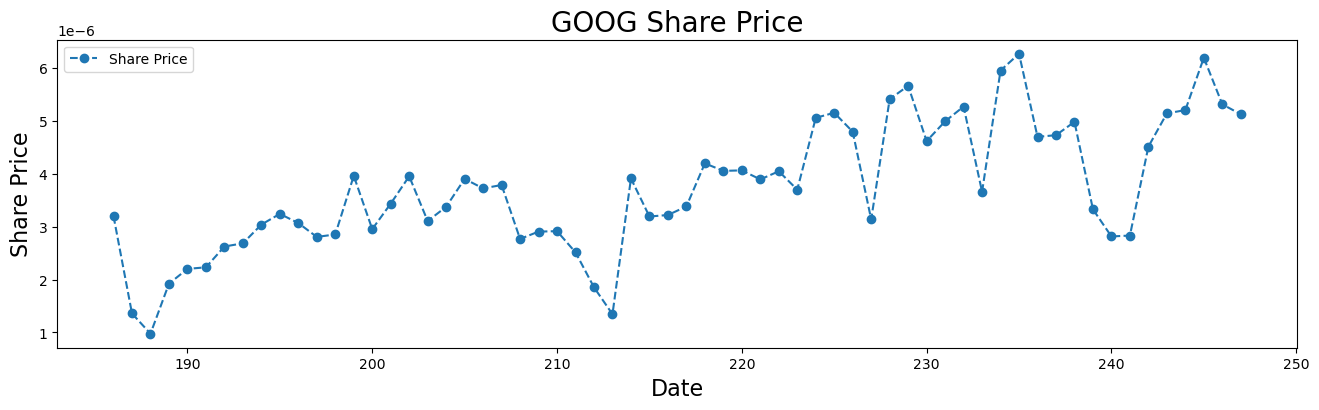

Average Daily Return: -6.680907497623024e-05
Volatility: 0.02071018305867296


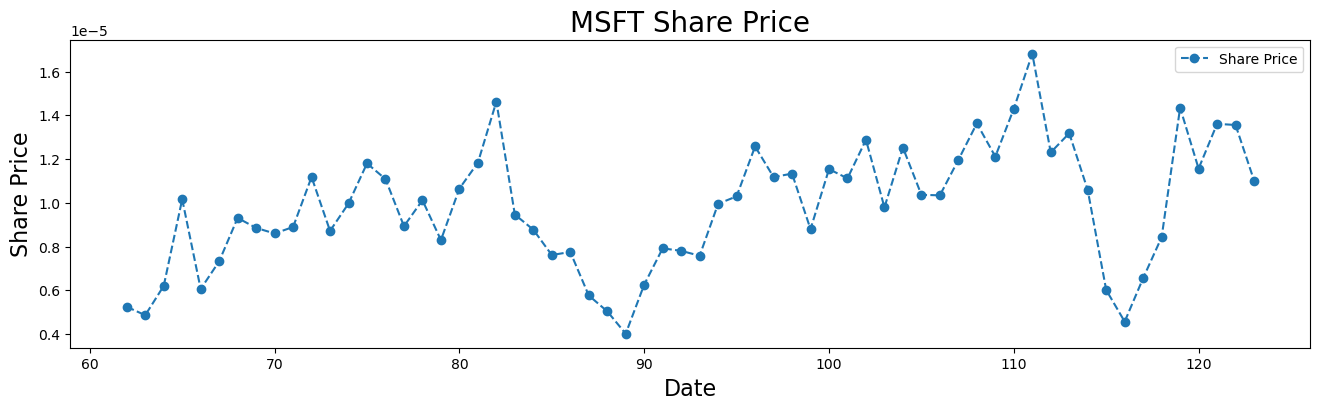

Average Daily Return: 0.0026465147231256726
Volatility: 0.01785336207176081


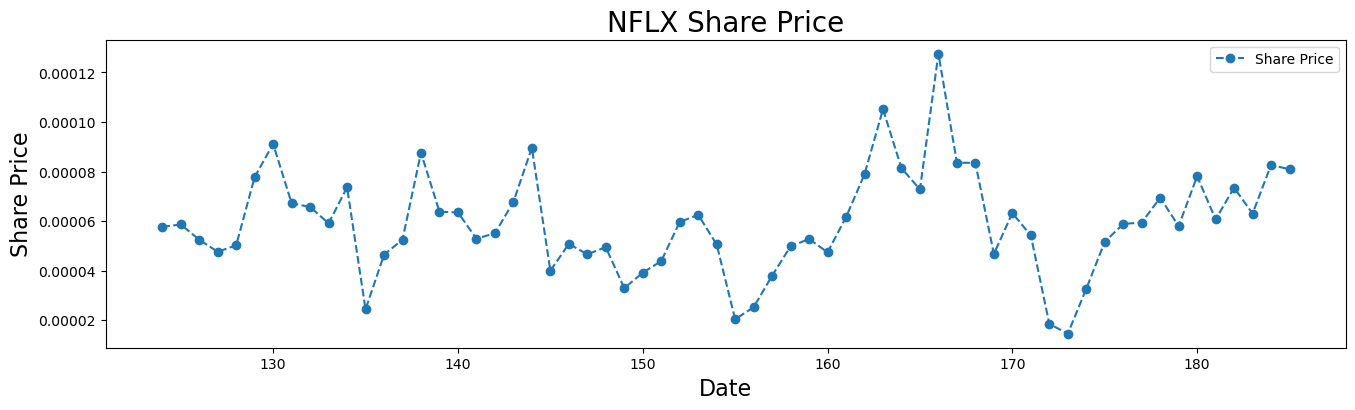

Average Daily Return: -0.001676395789809318
Volatility: 0.02248133504519506


In [80]:
def share_price(df, stock):
    df['Share Price'] = df['Adj Close'] / df['Volume'] # Share price is the adjusted close divided by the volume
    df['Share Price'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    plt.title(f'{stock} Share Price', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Share Price', fontsize=16)
    plt.show();
    print(f'Average Daily Return: {df["Daily Return"].mean()}')
    print(f'Volatility: {df["Daily Return"].std()}')

share_price(AAPL, 'AAPL')
share_price(GOOG, 'GOOG')
share_price(MSFT, 'MSFT')
share_price(NFLX, 'NFLX')

* Part II: Predicting Stock Prices , Time Series Analysis

Cheerio!

# Time Series Analysis
* Time series analysis is a statistical technique that deals with time series data, or trend analysis. Time series data means that data is in a series of particular time periods or intervals. The data is considered in three types:
    * Time series data: A set of observations on the values that a variable takes at different times.
    * Cross-sectional data: Data of one or more variables, collected at the same point in time.
    * Pooled data: A combination of time series data and cross-sectional data.

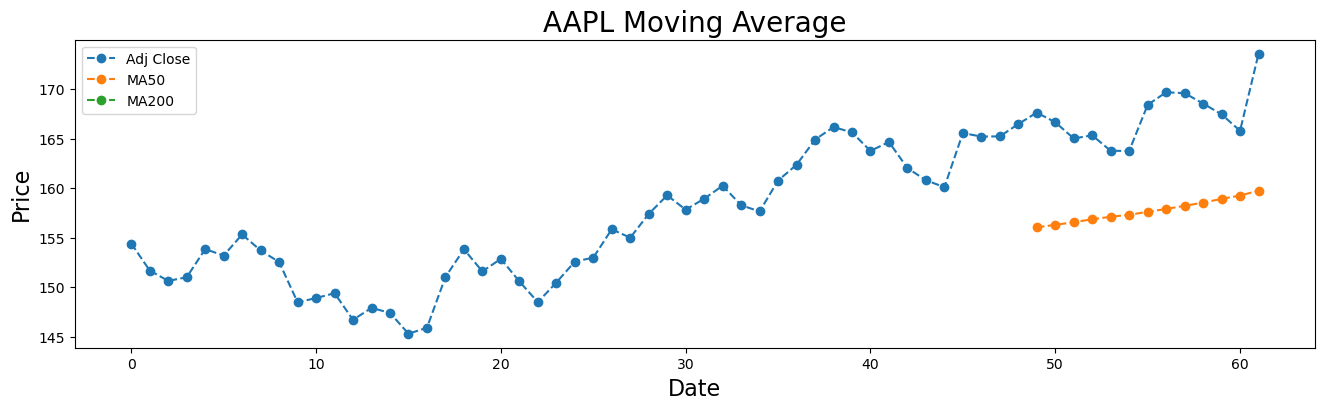

Average Daily Return: 0.0020165498394368146
Volatility: 0.0141516616757471
50 Day Moving Average: 157.7228939819336
200 Day Moving Average: nan


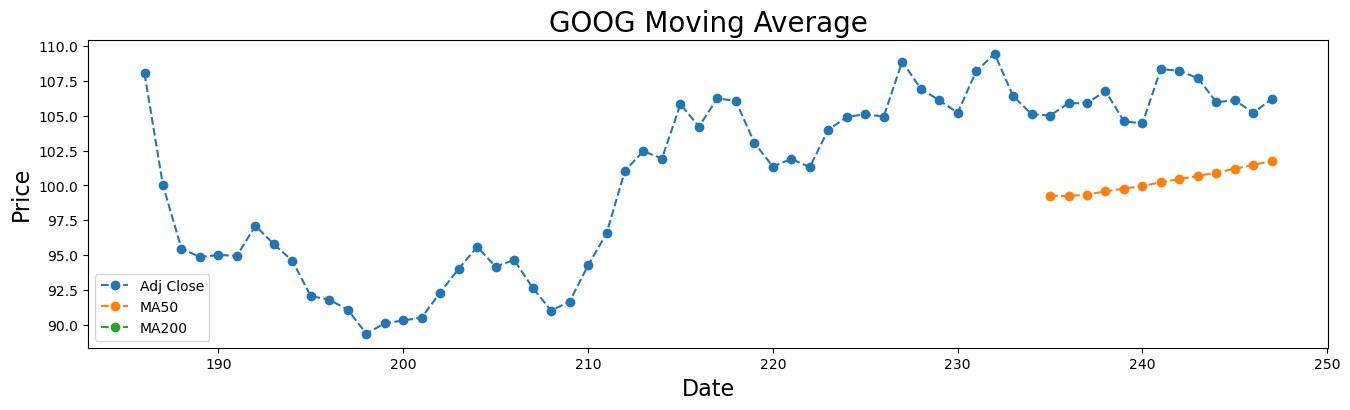

Average Daily Return: -6.680907497623024e-05
Volatility: 0.02071018305867296
50 Day Moving Average: 100.29810030423678
200 Day Moving Average: nan


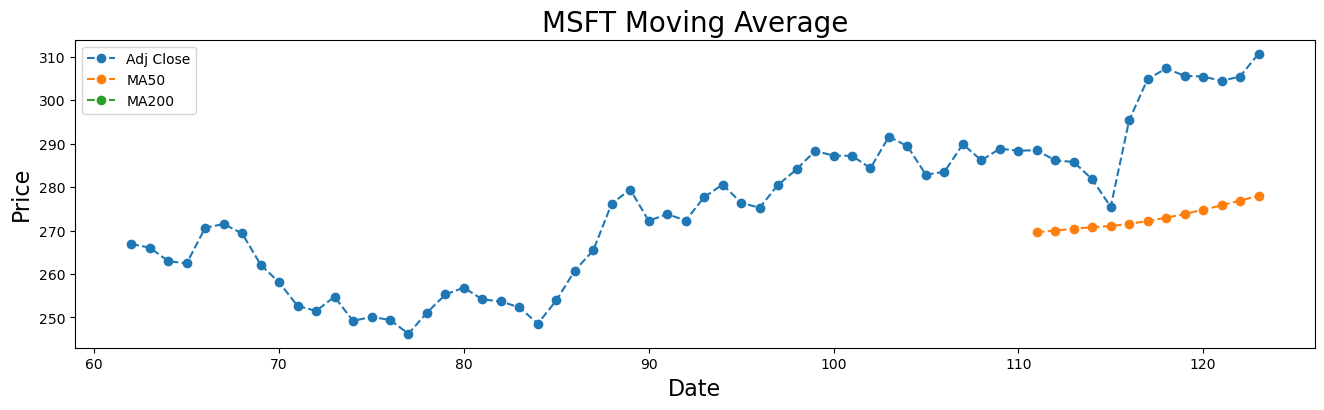

Average Daily Return: 0.0026465147231256726
Volatility: 0.01785336207176081
50 Day Moving Average: 272.89688380314755
200 Day Moving Average: nan


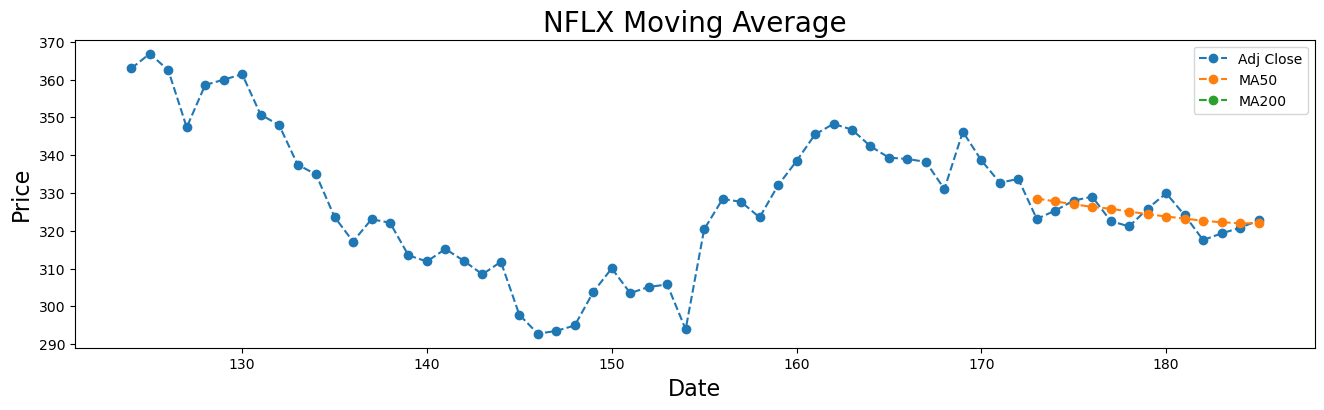

Average Daily Return: -0.001676395789809318
Volatility: 0.02248133504519506
50 Day Moving Average: 324.6661849271334
200 Day Moving Average: nan


In [81]:
# Create a function to calculate the moving average
def moving_average(df, stock):
    df['MA50'] = df['Adj Close'].rolling(50).mean()
    df['MA200'] = df['Adj Close'].rolling(200).mean()
    df['Adj Close'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    df['MA50'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    df['MA200'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
    plt.title(f'{stock} Moving Average', fontsize=20)
    plt.xlabel('Date', fontsize=16)
    plt.ylabel('Price', fontsize=16)
    plt.show();
    print(f'Average Daily Return: {df["Daily Return"].mean()}')
    print(f'Volatility: {df["Daily Return"].std()}')
    print(f'50 Day Moving Average: {df["MA50"].mean()}')
    print(f'200 Day Moving Average: {df["MA200"].mean()}')

moving_average(AAPL, 'AAPL')
moving_average(GOOG, 'GOOG')
moving_average(MSFT, 'MSFT')
moving_average(NFLX, 'NFLX')

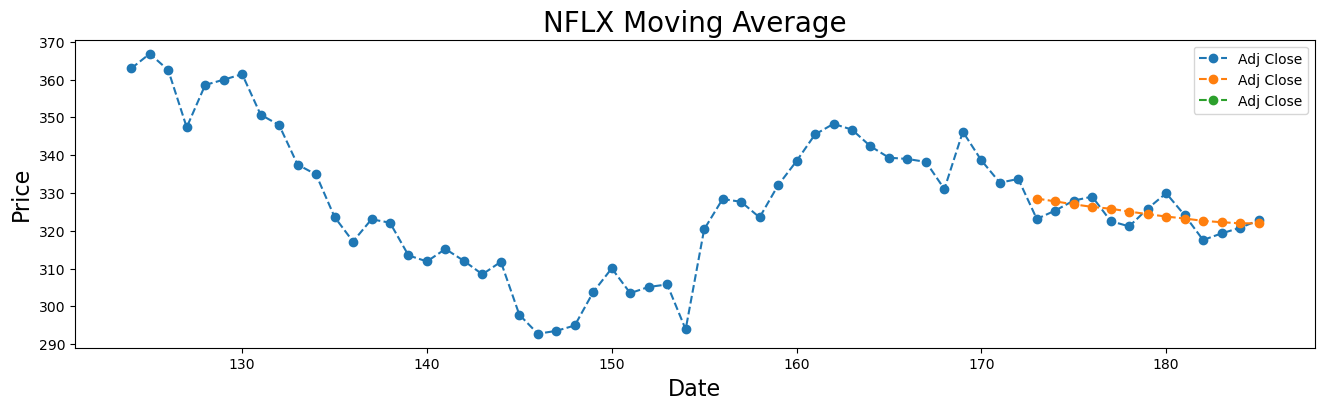

In [82]:
# More time series plots types:
NFLX['Adj Close'].plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
NFLX['Adj Close'].rolling(50).mean().plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
NFLX['Adj Close'].rolling(200).mean().plot(figsize=(16,4), legend=True, linestyle='--', marker='o')
plt.title('NFLX Moving Average', fontsize=20)
plt.xlabel('Date', fontsize=16)
plt.ylabel('Price', fontsize=16)
plt.show();